In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [202]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 9000

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [215]:
# crystal asymmetry angle
alphaAsym = 19.88*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = 2.898
# distance between CRLs and focus
f2 = 3

# crystal reflection hkl index
hkl = [3,1,1]

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=819.9, FOV=2e-3, N=256)
crl0 = optics.CRL('crl0', z=819.95, roc=1667e-6, diameter=5e-3)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=820, E0=E0,
                          alphaAsym=0, orientation=0, pol='p')

# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='p')
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

# CRL with ~1 meter focal length (modeled as single element for now)
crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=25.25e-6, diameter=5e-3)

# viewing point downstream of first crl
im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

# viewing point at focus
focus = optics.PPM('focus', z=crl1.z+f2+.128, FOV=100e-6, N=256)

# slit at focus
slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3, x_width=1e-6, y_width=2e-3)

# second CRL with ~1 meter focal length, for collimation
crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=25.25e-6, diameter=5e-3)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+.15, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+.15 + (f1-.15)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='p')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
x is focused
y is focused
b 1.00
b 8.07
crystal 2 incidence angle: 44.76 degrees
crystal 2 exit angle: 5.01 degrees
b 1.00
b 0.12
after c1: 0.87
after c2: -0.00
after c3: -0.87
after c4: -0.00


In [216]:
(f1-.15)*np.cos(crystal1.beta0*2)+.15

1.9254013991000398

In [217]:
print(crl2.orientation)

0


In [218]:
for item in mono_beamline.full_list:
    print(item)
print(mono_beamline.full_list[19].dz)
print(1/np.cos(crystal1.beta0*2))
print(crystal1.beta0)

2.748520035718253
1.5478189897749182
0.4341857651913606


In [219]:
print('crystal 1 incidence angle: {:.2f} degrees'.format(crystal1.alpha*180/np.pi))
print('crystal 1 exit angle: {:.2f} degrees'.format(crystal1.beta0*180/np.pi))

crystal 1 incidence angle: 24.88 degrees
crystal 1 exit angle: 24.88 degrees


### Propagation through monochromator at central photon energy

FWHM in x: 655.2898625941441 microns
FWHM in y: 655.2898625941441 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721895.91 microns
zRy: 73721895.91 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.034806
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43310689344.02 microns
zRy: 73721895.91 microns
remaining distance: 50000.00 microns
goal for zx: 4604084806.41 microns
current zx: 4604034806.41 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4604.084806
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated dis

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


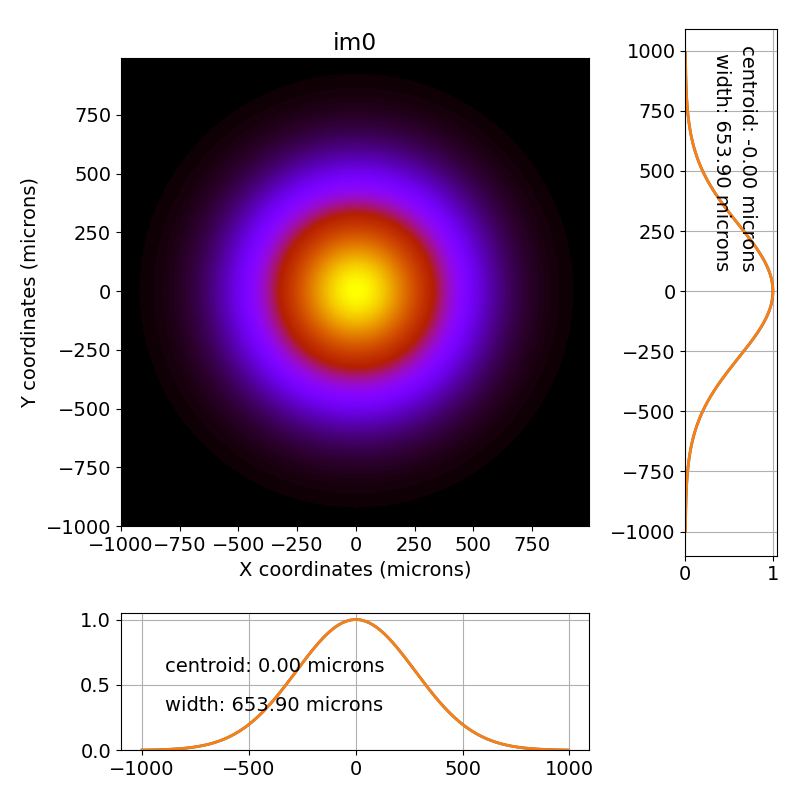

<IPython.core.display.Javascript object>


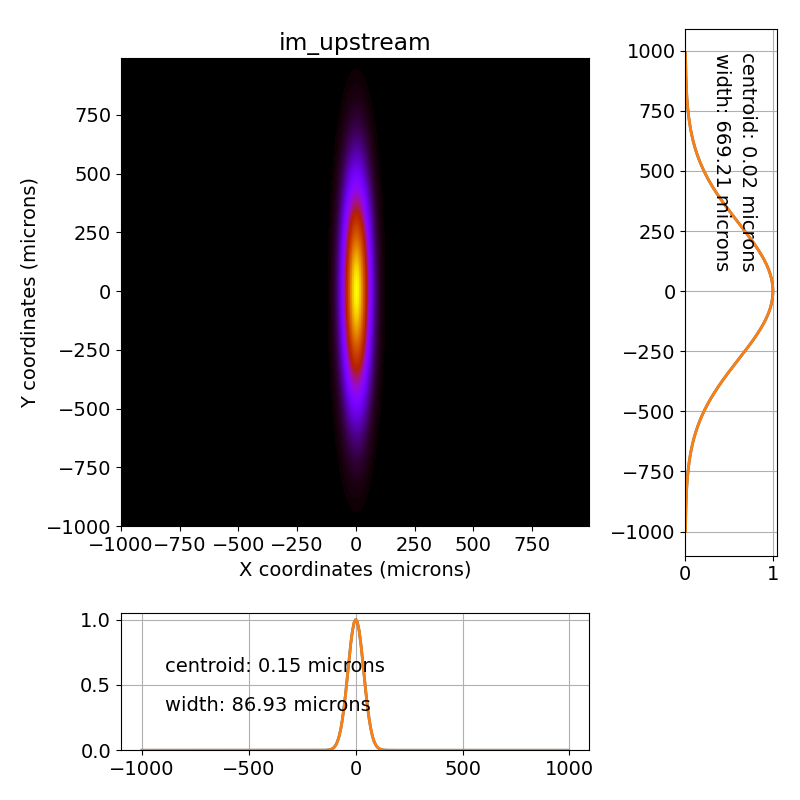

<IPython.core.display.Javascript object>


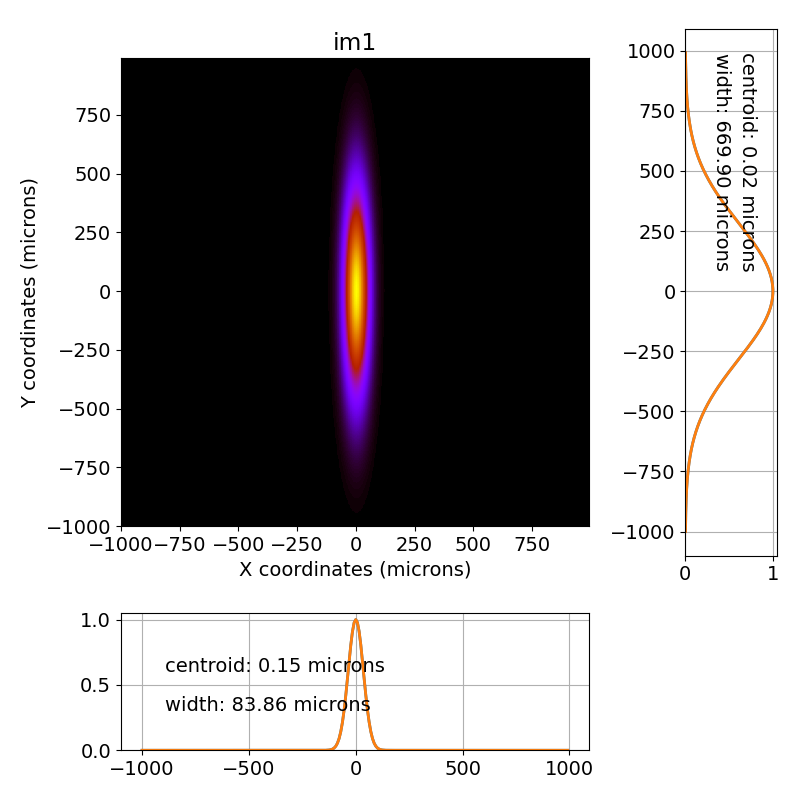

<IPython.core.display.Javascript object>


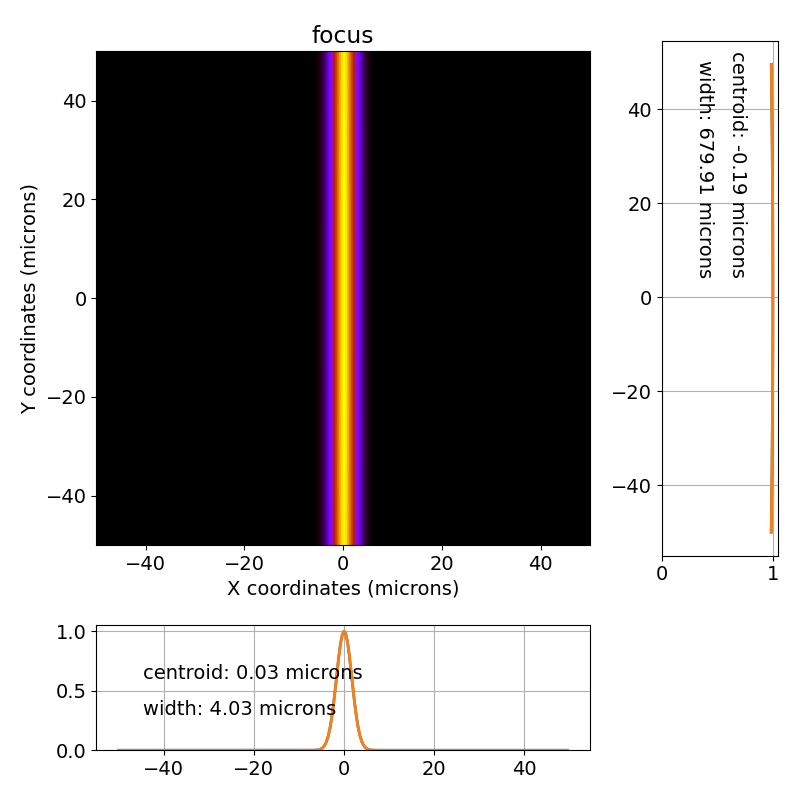

<IPython.core.display.Javascript object>


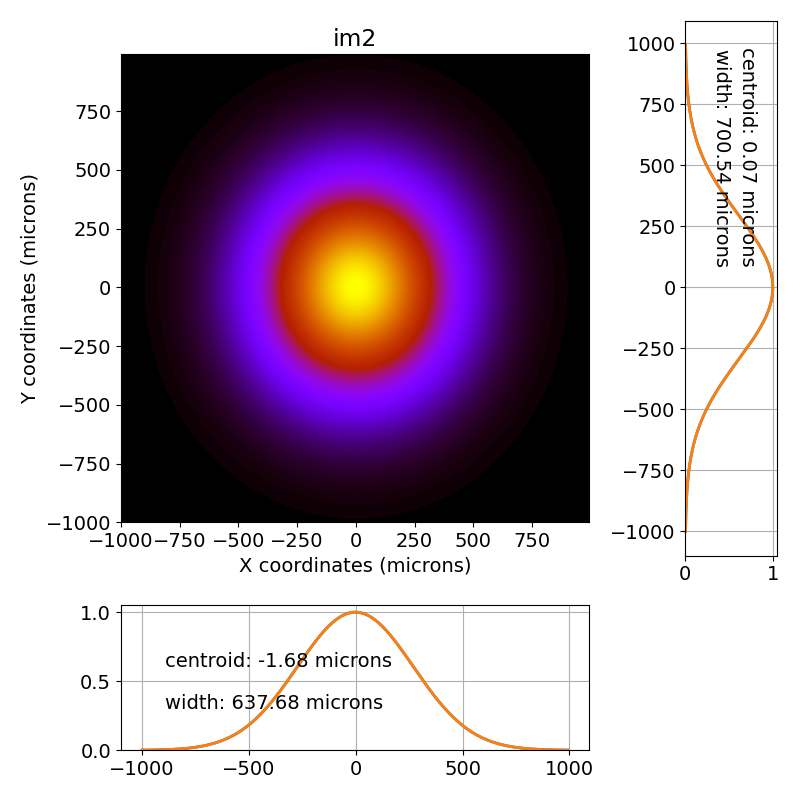

In [220]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im_upstream.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

<IPython.core.display.Javascript object>


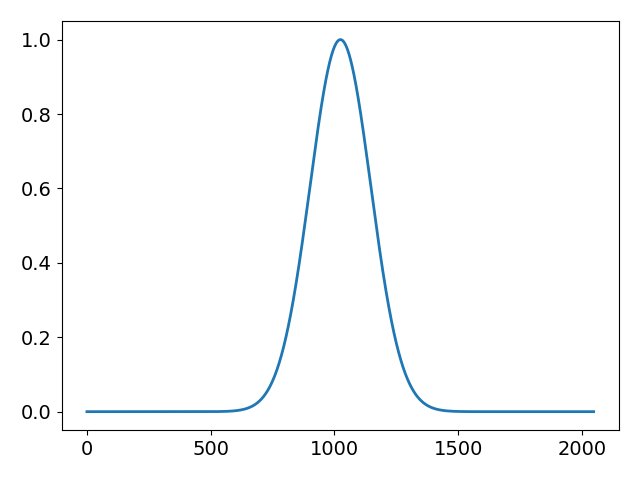

In [74]:
plt.figure()
plt.plot(np.abs(b2.wavey))

## Time-domain propagation

In [221]:
# reset central photon energy
beam_params['photonEnergy'] = 9000

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=40, time_window=4000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 224


In [222]:
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
x is focused
y is focused
FWHM in x: 655.2983203753022 microns
FWHM in y: 655.2983203753022 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73720945.09 microns
zRy: 73720945.09 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4606.629364
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43358958475.96 microns
zRy: 73720945.09 microns
remaining distance: 50000.00 microns
goal for zx: 4606679363.56 microns
current zx: 4606629363.56 microns
goal fo

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131185426057268
5.131185426057268
x is focused
y is focused
FWHM in x: 655.2982445197915 microns
FWHM in y: 655.2982445197915 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131185426057268
5.131185426057268
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73720953.62 microns
zRy: 73720953.62 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4606.606081
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43358525207.65 microns
zRy: 73720953.62 microns
remaining distance: 50000.00 microns
goal for zx: 4606656080.99 microns
current zx: 4606606080.99 microns
goal fo

zx: -3.028361
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722252663.21 microns
zRy: 73720970.67 microns
remaining distance: 3028000.04 microns
goal for zx: -360.63 microns
current zx: -3028360.66 microns
goal for zy: 197573819.05 microns
current zy: 194545819.01 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000361
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000361
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722252663.21 microns
zRy: 73720970.67 microns
remaining distance: 2872000.04 microns
goal for zx: 2871639.41 microns
current zx: -360.63 microns
goal for zy: 200445819.09 microns
current zy: 197573819.05 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871639
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.663445
zy: 200.445819
azimuth -0.20 mrad
drift9
delta z: 2.42
zRx: 591588181.24 microns
zRy: 737209

zx: -0.000363
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000363
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722231158.10 microns
zRy: 73720996.26 microns
remaining distance: 2872000.04 microns
goal for zx: 2871637.01 microns
current zx: -363.02 microns
goal for zy: 200445819.09 microns
current zy: 197573819.05 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871637
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.661187
zy: 200.445819
azimuth -0.20 mrad
drift9
delta z: 2.42
zRx: 591532910.19 microns
zRy: 73720996.26 microns
remaining distance: 149744.74 microns
goal for zx: 66810931.91 microns
current zx: 66661187.17 microns
goal for zy: 200595563.83 microns
current zy: 200445819.09 microns
current step size: 149744.74 microns
x becomes focused
y stays unfocused
zx: 66.810932
zy: 200.595564
azimuth -0.20 mrad
c3
Calculated distance to focus: -66.810932
zRx: 5.92e+0

zx: -0.000365
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000365
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722209653.52 microns
zRy: 73721021.84 microns
remaining distance: 2872000.04 microns
goal for zx: 2871634.61 microns
current zx: -365.42 microns
goal for zy: 200445819.09 microns
current zy: 197573819.05 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871635
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.658929
zy: 200.445819
azimuth -0.20 mrad
drift9
delta z: 2.42
zRx: 591477645.44 microns
zRy: 73721021.84 microns
remaining distance: 149752.00 microns
goal for zx: 66808681.23 microns
current zx: 66658929.22 microns
goal for zy: 200595571.09 microns
current zy: 200445819.09 microns
current step size: 149752.00 microns
x becomes focused
y stays unfocused
zx: 66.808681
zy: 200.595571
azimuth -0.20 mrad
c3
Calculated distance to focus: -66.808681
zRx: 5.91e+0

delta z: 2.42
zRx: 591422386.98 microns
zRy: 73721047.42 microns
remaining distance: 149759.26 microns
goal for zx: 66806430.65 microns
current zx: 66656671.39 microns
goal for zy: 200595578.35 microns
current zy: 200445819.09 microns
current step size: 149759.26 microns
x becomes focused
y stays unfocused
zx: 66.806431
zy: 200.595578
azimuth -0.20 mrad
c3
Calculated distance to focus: -66.806431
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.812358
zy: 200.595578
azimuth -868.49 mrad
drift10
delta z: -2.06
zRx: 591422386.98 microns
zRy: 73721047.42 microns
remaining distance: 2748724.60 microns
goal for zx: 69561082.64 microns
current zx: 66812358.03 microns
goal for zy: 203344302.95 microns
current zy: 200595578.35 microns
current step size: 2748724.60 microns
x remains focused
y stays unfocused
zx: 69.561083
zy: 203.344303
azimuth -868.49 mrad
c4
Calculated distance to focus: -4539.281935
zRx: 9.82e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4543.378657
zy: 203.344303
azimuth -0.12 mrad
drift11
d

zx: -3.028369
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722173813.72 microns
zRy: 73721064.48 microns
remaining distance: 3028000.04 microns
goal for zx: -369.42 microns
current zx: -3028369.46 microns
goal for zy: 197573819.05 microns
current zy: 194545819.01 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000369
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000369
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722173813.72 microns
zRy: 73721064.48 microns
remaining distance: 2872000.04 microns
goal for zx: 2871630.62 microns
current zx: -369.42 microns
goal for zy: 200445819.09 microns
current zy: 197573819.05 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871631
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.655166
zy: 200.445819
azimuth -0.20 mrad
drift9
delta z: 2.42
zRx: 591385551.55 microns
zRy: 737210

zx: 73.557799
zy: 194.345819
azimuth -0.12 mrad
im_upstream
zx: 73.557799
zy: 194.345819
azimuth -0.12 mrad
drift5
delta z: 0.00
zRx: 2826136876339.14 microns
zRy: 73721081.53 microns
remaining distance: 100000.00 microns
goal for zx: 73657798.91 microns
current zx: 73557798.91 microns
goal for zy: 194445819.01 microns
current zy: 194345819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.657799
zy: 194.445819
azimuth -0.12 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128371
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 722159478.15 microns
zRy: 73721081.53 microns
remaining distance: 100000.00 microns
goal for zx: -3028371.06 microns
current zx: -3128371.06 microns
goal for zy: 194545819.01 microns
current zy: 194445819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028371
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028371
zy: 194.545819
azimuth -0.16 mrad
drift7
del

Calculated distance to focus: -70.788406
zRx: 2.83e+06
zRy: 7.37e+01
zx: 70.759698
zy: 191.547819
azimuth -0.12 mrad
drift4
delta z: 0.00
zRx: 2826031378274.09 microns
zRy: 73721098.59 microns
remaining distance: 2798000.02 microns
goal for zx: 73557698.42 microns
current zx: 70759698.40 microns
goal for zy: 194345819.01 microns
current zy: 191547818.99 microns
current step size: 2798000.02 microns
x remains focused
y stays unfocused
zx: 73.557698
zy: 194.345819
azimuth -0.12 mrad
im_upstream
zx: 73.557698
zy: 194.345819
azimuth -0.12 mrad
drift5
delta z: 0.00
zRx: 2826031378274.09 microns
zRy: 73721098.59 microns
remaining distance: 100000.00 microns
goal for zx: 73657698.42 microns
current zx: 73557698.42 microns
goal for zy: 194445819.01 microns
current zy: 194345819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.657698
zy: 194.445819
azimuth -0.12 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128373
zy: 194.445819
azimut

Calculated distance to focus: -4606.213757
zRx: 4.34e+04
zRy: 7.37e+01
zx: 4606.213757
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43350294353.11 microns
zRy: 73721115.64 microns
remaining distance: 1547818.99 microns
goal for zx: 4607761575.90 microns
current zx: 4606213756.91 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4607.761576
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.787691
zRx: 2.83e+06
zRy: 7.37e+01
zx: 70.759598
zy: 191.547819
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 2825925885605.83 microns
zRy: 73721115.64 microns
remaining distance: 2798000.02 microns
goal for zx: 73557597.91 microns
current zx: 70759597.89 microns
goal for zy: 194345819.01 microns
current zy: 191547818.99 microns
current step size: 2798000.02 microns
x remains focused
y stays unfocused
zx: 73.557598
zy: 194.345819
azimuth -0.13 mrad
im_upstream
zx:

zx: 66.799680
zy: 200.595600
azimuth -0.19 mrad
c3
Calculated distance to focus: -66.799680
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.805070
zy: 200.595600
azimuth -868.50 mrad
drift10
delta z: -2.06
zRx: 591256649.37 microns
zRy: 73721124.17 microns
remaining distance: 2748706.10 microns
goal for zx: 69553776.26 microns
current zx: 66805070.17 microns
goal for zy: 203344306.23 microns
current zy: 200595600.13 microns
current step size: 2748706.10 microns
x remains focused
y stays unfocused
zx: 69.553776
zy: 203.344306
azimuth -868.50 mrad
c4
Calculated distance to focus: -4538.805150
zRx: 9.82e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4542.530630
zy: 203.344306
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41864503175.84 microns
zRy: 73721124.17 microns
remaining distance: 100023.46 microns
goal for zx: 4542630653.78 microns
current zx: 4542530630.31 microns
goal for zy: 203444329.69 microns
current zy: 203344306.23 microns
current step size: 100023.46 microns
x becomes focused
y stays unfo

zx: -3.028377
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028377
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722109305.50 microns
zRy: 73721141.22 microns
remaining distance: 3028000.04 microns
goal for zx: -376.62 microns
current zx: -3028376.65 microns
goal for zy: 197573819.05 microns
current zy: 194545819.01 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000377
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000377
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722109305.50 microns
zRy: 73721141.22 microns
remaining distance: 2872000.04 microns
goal for zx: 2871623.42 microns
current zx: -376.62 microns
goal for zy: 200445819.09 microns
current zy: 197573819.05 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871623
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.648394
zy: 200.445819
azimuth -0.19 mrad
drift9

zRx: 2.83e+06
zRy: 7.37e+01
zx: 70.759347
zy: 191.547819
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 2825662177570.14 microns
zRy: 73721158.28 microns
remaining distance: 2798000.02 microns
goal for zx: 73557346.58 microns
current zx: 70759346.56 microns
goal for zy: 194345819.01 microns
current zy: 191547818.99 microns
current step size: 2798000.02 microns
x remains focused
y stays unfocused
zx: 73.557347
zy: 194.345819
azimuth -0.13 mrad
im_upstream
zx: 73.557347
zy: 194.345819
azimuth -0.13 mrad
drift5
delta z: 0.00
zRx: 2825662177570.14 microns
zRy: 73721158.28 microns
remaining distance: 100000.00 microns
goal for zx: 73657346.58 microns
current zx: 73557346.58 microns
goal for zy: 194445819.01 microns
current zy: 194345819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.657347
zy: 194.445819
azimuth -0.13 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128378
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 72

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131200880598044
5.131200880598044
x is focused
y is focused
FWHM in x: 655.2962722826798 microns
FWHM in y: 655.2962722826798 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131200880598044
5.131200880598044
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721175.33 microns
zRy: 73721175.33 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4606.000817
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43347262528.34 microns
zRy: 73721175.33 microns
remaining distance: 50000.00 microns
goal for zx: 4606050816.86 microns
current zx: 4606000816.86 microns
goal fo

zx: 66.799403
zy: 200.595617
azimuth -868.50 mrad
drift10
delta z: -2.06
zRx: 591127781.52 microns
zRy: 73721183.86 microns
remaining distance: 2748691.70 microns
goal for zx: 69548094.35 microns
current zx: 66799402.65 microns
goal for zy: 203344308.77 microns
current zy: 200595617.07 microns
current step size: 2748691.70 microns
x remains focused
y stays unfocused
zx: 69.548094
zy: 203.344309
azimuth -868.50 mrad
c4
Calculated distance to focus: -4538.434371
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4541.871202
zy: 203.344309
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41852461633.86 microns
zRy: 73721183.86 microns
remaining distance: 100021.65 microns
goal for zx: 4541971223.40 microns
current zx: 4541871201.75 microns
goal for zy: 203444330.42 microns
current zy: 203344308.77 microns
current step size: 100021.65 microns
x becomes focused
y stays unfocused
zx: 4541.971223
zy: 203.444330
azimuth -0.12 mrad
im2
zx: 4541.971223
zy: 203.444330
azimuth -0.12 mrad
FWHM in x:

zx: -0.000382
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000382
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722059135.66 microns
zRy: 73721200.92 microns
remaining distance: 2872000.04 microns
goal for zx: 2871617.82 microns
current zx: -382.21 microns
goal for zy: 200445819.09 microns
current zy: 197573819.05 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871618
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.643127
zy: 200.445819
azimuth -0.19 mrad
drift9
delta z: 2.42
zRx: 591090968.42 microns
zRy: 73721200.92 microns
remaining distance: 149802.82 microns
goal for zx: 66792929.67 microns
current zx: 66643126.85 microns
goal for zy: 200595621.91 microns
current zy: 200445819.09 microns
current step size: 149802.82 microns
x becomes focused
y stays unfocused
zx: 66.792930
zy: 200.595622
azimuth -0.19 mrad
c3
Calculated distance to focus: -66.792930
zRx: 5.91e+0

zRy: 73721217.97 microns
remaining distance: 100000.00 microns
goal for zx: -3028383.85 microns
current zx: -3128383.85 microns
goal for zy: 194545819.02 microns
current zy: 194445819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028384
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028384
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722044801.93 microns
zRy: 73721217.97 microns
remaining distance: 3028000.04 microns
goal for zx: -383.81 microns
current zx: -3028383.85 microns
goal for zy: 197573819.05 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000384
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000384
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722044801.93 microns
zRy: 73721217.97 microns
remaining distance: 2872000.04 microns
goal for zx: 2871616.22 microns
current zx: -383.81 microns
goal for zy: 200445819.09 microns
current zy: 

zx: 4541.500281
zy: 203.444331
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131205041435946
5.131205041435946
x is focused
y is focused
FWHM in x: 655.2957412977955 microns
FWHM in y: 655.2957412977955 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131205041435946
5.131205041435946
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721235.03 microns
zRy: 73721235.03 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.837888
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43344231024.06 microns
zRy: 73721235.03 microns
remaining distance: 50000.00 microns
goal for zx: 4605887888.31

zx: 73.656793
zy: 194.445819
azimuth -0.13 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128387
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 722016135.10 microns
zRy: 73721252.08 microns
remaining distance: 100000.00 microns
goal for zx: -3028387.05 microns
current zx: -3128387.05 microns
goal for zy: 194545819.02 microns
current zy: 194445819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028387
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028387
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722016135.10 microns
zRy: 73721252.08 microns
remaining distance: 3028000.04 microns
goal for zx: -387.01 microns
current zx: -3028387.05 microns
goal for zy: 197573819.05 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000387
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000387
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.794791
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43342498879.77 microns
zRy: 73721269.14 microns
remaining distance: 1547818.99 microns
goal for zx: 4607342610.47 microns
current zx: 4605794791.48 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4607.342610
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.781254
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.758693
zy: 191.547819
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 2824976694591.21 microns
zRy: 73721269.14 microns
remaining distance: 2798000.02 microns
goal for zx: 73556692.71 microns
current zx: 70758692.68 microns
goal for zy: 194345819.01 microns
current zy: 191547818.99 microns
current step size: 2798000.02 microns
x remains focused
y stays unfocused
zx: 73.556693
zy: 194.345819
azimuth -0.13 mrad
im_upstream
zx: 73.556693
zy: 194.345819
azimuth -0.13 mra

zx: 66.786181
zy: 200.595644
azimuth -0.19 mrad
c3
Calculated distance to focus: -66.786181
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.790498
zy: 200.595644
azimuth -868.50 mrad
drift10
delta z: -2.06
zRx: 590925344.05 microns
zRy: 73721277.66 microns
remaining distance: 2748669.08 microns
goal for zx: 69539167.09 microns
current zx: 66790498.01 microns
goal for zy: 203344312.78 microns
current zy: 200595643.69 microns
current step size: 2748669.08 microns
x remains focused
y stays unfocused
zx: 69.539167
zy: 203.344313
azimuth -868.50 mrad
c4
Calculated distance to focus: -4537.851813
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4540.835218
zy: 203.344313
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41833547463.74 microns
zRy: 73721277.66 microns
remaining distance: 100018.79 microns
goal for zx: 4540935237.21 microns
current zx: 4540835218.42 microns
goal for zy: 203444331.57 microns
current zy: 203344312.78 microns
current step size: 100018.79 microns
x becomes focused
y stays unfo

zx: -0.000391
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000391
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721980302.96 microns
zRy: 73721294.72 microns
remaining distance: 2872000.04 microns
goal for zx: 2871609.03 microns
current zx: -391.01 microns
goal for zy: 200445819.09 microns
current zy: 197573819.06 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871609
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.634852
zy: 200.445819
azimuth -0.19 mrad
drift9
delta z: 2.42
zRx: 590888546.37 microns
zRy: 73721294.72 microns
remaining distance: 149829.44 microns
goal for zx: 66784681.15 microns
current zx: 66634851.70 microns
goal for zy: 200595648.53 microns
current zy: 200445819.09 microns
current step size: 149829.44 microns
x becomes focused
y stays unfocused
zx: 66.784681
zy: 200.595649
azimuth -0.19 mrad
c3
Calculated distance to focus: -66.784681
zRx: 5.91e+0

zx: 73.656441
zy: 194.445819
azimuth -0.13 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128393
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721965970.45 microns
zRy: 73721311.77 microns
remaining distance: 100000.00 microns
goal for zx: -3028392.65 microns
current zx: -3128392.65 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028393
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028393
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721965970.45 microns
zRy: 73721311.77 microns
remaining distance: 3028000.04 microns
goal for zx: -392.61 microns
current zx: -3028392.65 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000393
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000393
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zx: 70.758340
zy: 191.547819
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 2824607682594.49 microns
zRy: 73721328.83 microns
remaining distance: 2798000.03 microns
goal for zx: 73556340.37 microns
current zx: 70758340.34 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.556340
zy: 194.345819
azimuth -0.13 mrad
im_upstream
zx: 73.556340
zy: 194.345819
azimuth -0.13 mrad
drift5
delta z: 0.00
zRx: 2824607682594.49 microns
zRy: 73721328.83 microns
remaining distance: 100000.00 microns
goal for zx: 73656340.37 microns
current zx: 73556340.37 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.656340
zy: 194.445819
azimuth -0.13 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128394
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721951638.20 microns
zRy: 7372

zx: 4605.585337
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43338601937.65 microns
zRy: 73721345.88 microns
remaining distance: 1547818.99 microns
goal for zx: 4607133156.34 microns
current zx: 4605585337.35 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4607.133156
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.778037
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.758240
zy: 191.547819
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 2824502262788.48 microns
zRy: 73721345.88 microns
remaining distance: 2798000.03 microns
goal for zx: 73556239.67 microns
current zx: 70758239.64 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.556240
zy: 194.345819
azimuth -0.14 mrad
im_upstream
zx: 73.556240
zy: 194.345819
azimuth -0.14 mrad
drift5
delta z: 0.00
zRx: 

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.465523
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43337303074.63 microns
zRy: 73721371.47 microns
remaining distance: 50000.00 microns
goal for zx: 4605515523.46 microns
current zx: 4605465523.46 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4605.515523
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4605.515523
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.515523
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43337303074.63 microns
zRy: 73721371.47 microns
remaining distance: 1547818.99 microns
goal for zx: 4607063342.40 microns
current zx: 4605515523.41 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4607.063342
zy: 191.547819
az

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.395712
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43336004270.45 microns
zRy: 73721397.05 microns
remaining distance: 50000.00 microns
goal for zx: 4605445711.76 microns
current zx: 4605395711.76 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4605.445712
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4605.445712
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.445712
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43336004270.45 microns
zRy: 73721397.05 microns
remaining distance: 1547818.99 microns
goal for zx: 4606993530.76 microns
current zx: 4605445711.77 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4606.993531
zy: 191.547819
az

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312175239496485
5.1312175239496485
x is focused
y is focused
FWHM in x: 655.2941483483123 microns
FWHM in y: 655.2941483483123 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312175239496485
5.1312175239496485
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721414.10 microns
zRy: 73721414.10 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.349172
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43335138433.68 microns
zRy: 73721414.10 microns
remaining distance: 50000.00 microns
goal for zx: 4605399171.80 microns
current zx: 4605349171.80 microns
goa

zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.776740
zy: 200.595685
azimuth -868.51 mrad
drift10
delta z: -2.06
zRx: 590612652.45 microns
zRy: 73721422.63 microns
remaining distance: 2748634.13 microns
goal for zx: 69525373.93 microns
current zx: 66776739.80 microns
goal for zy: 203344318.96 microns
current zy: 200595684.83 microns
current step size: 2748634.13 microns
x remains focused
y stays unfocused
zx: 69.525374
zy: 203.344319
azimuth -868.51 mrad
c4
Calculated distance to focus: -4536.951726
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4539.234782
zy: 203.344319
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41804336308.21 microns
zRy: 73721422.63 microns
remaining distance: 100014.39 microns
goal for zx: 4539334796.58 microns
current zx: 4539234782.19 microns
goal for zy: 203444333.35 microns
current zy: 203344318.96 microns
current step size: 100014.39 microns
x becomes focused
y stays unfocused
zx: 4539.334797
zy: 203.444333
azimuth -0.12 mrad
im2
zx: 4539.334797
zy: 203.444333
a

zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.775121
zy: 200.595690
azimuth -868.51 mrad
drift10
delta z: -2.06
zRx: 590575878.44 microns
zRy: 73721439.69 microns
remaining distance: 2748630.02 microns
goal for zx: 69523751.48 microns
current zx: 66775121.46 microns
goal for zy: 203344319.69 microns
current zy: 200595689.67 microns
current step size: 2748630.02 microns
x remains focused
y stays unfocused
zx: 69.523751
zy: 203.344320
azimuth -868.51 mrad
c4
Calculated distance to focus: -4536.845851
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4539.046545
zy: 203.344320
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41800901278.48 microns
zRy: 73721439.69 microns
remaining distance: 100013.87 microns
goal for zx: 4539146559.33 microns
current zx: 4539046545.46 microns
goal for zy: 203444333.55 microns
current zy: 203344319.69 microns
current step size: 100013.87 microns
x becomes focused
y stays unfocused
zx: 4539.146559
zy: 203.444334
azimuth -0.12 mrad
im2
zx: 4539.146559
zy: 203.444334
a

zx: 66.770437
zy: 200.595695
azimuth -0.18 mrad
c3
Calculated distance to focus: -66.770437
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.773503
zy: 200.595695
azimuth -868.51 mrad
drift10
delta z: -2.06
zRx: 590539107.27 microns
zRy: 73721456.74 microns
remaining distance: 2748625.91 microns
goal for zx: 69522129.09 microns
current zx: 66773503.19 microns
goal for zy: 203344320.41 microns
current zy: 200595694.51 microns
current step size: 2748625.91 microns
x remains focused
y stays unfocused
zx: 69.522129
zy: 203.344320
azimuth -868.51 mrad
c4
Calculated distance to focus: -4536.739981
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4538.858320
zy: 203.344320
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41797466587.72 microns
zRy: 73721456.74 microns
remaining distance: 100013.35 microns
goal for zx: 4538958332.96 microns
current zx: 4538858319.61 microns
goal for zy: 203444333.76 microns
current zy: 203344320.41 microns
current step size: 100013.35 microns
x becomes focused
y stays unfo

zx: 73.655484
zy: 194.445819
azimuth -0.14 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128408
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721829823.10 microns
zRy: 73721473.80 microns
remaining distance: 100000.00 microns
goal for zx: -3028407.84 microns
current zx: -3128407.84 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028408
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028408
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721829823.10 microns
zRy: 73721473.80 microns
remaining distance: 3028000.04 microns
goal for zx: -407.80 microns
current zx: -3028407.84 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000408
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000408
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.757383
zy: 191.547819
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 2823606411366.44 microns
zRy: 73721490.85 microns
remaining distance: 2798000.03 microns
goal for zx: 73555383.15 microns
current zx: 70757383.12 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.555383
zy: 194.345819
azimuth -0.14 mrad
im_upstream
zx: 73.555383
zy: 194.345819
azimuth -0.14 mrad
drift5
delta z: 0.00
zRx: 2823606411366.44 microns
zRy: 73721490.85 microns
remaining distance: 100000.00 microns
goal for zx: 73655383.15 microns
current zx: 73555383.15 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.655383
zy: 194.445819
azimuth -0.14 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128409
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 72

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721507.91 microns
zRy: 73721507.91 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.093219
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43330376798.81 microns
zRy: 73721507.91 microns
remaining distance: 50000.00 microns
goal for zx: 4605143218.82 microns
current zx: 4605093218.82 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4605.143219
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4605.143219
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.143219
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43330376798.81 microns
zRy: 73721507.91 

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312252512200365
5.1312252512200365
x is focused
y is focused
FWHM in x: 655.2931622406123 microns
FWHM in y: 655.2931622406123 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312252512200365
5.1312252512200365
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721524.96 microns
zRy: 73721524.96 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.046685
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43329511131.98 microns
zRy: 73721524.96 microns
remaining distance: 50000.00 microns
goal for zx: 4605096684.98 microns
current zx: 4605046684.98 microns
goa

zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4538.011434
zy: 203.344324
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41782014590.97 microns
zRy: 73721533.49 microns
remaining distance: 100011.02 microns
goal for zx: 4538111444.53 microns
current zx: 4538011433.51 microns
goal for zy: 203444334.70 microns
current zy: 203344323.69 microns
current step size: 100011.02 microns
x becomes focused
y stays unfocused
zx: 4538.111445
zy: 203.444335
azimuth -0.12 mrad
im2
zx: 4538.111445
zy: 203.444335
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131226440030866
5.131226440030866
x is focused
y is focused
FWHM in x: 655.2930105319991 microns
FWHM in y: 655.2930105319991 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131226440030866
5.131226440030866
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721542.02 microns
zRy: 7372

zx: 69.513207
zy: 203.344324
azimuth -868.52 mrad
c4
Calculated distance to focus: -4536.157761
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4537.823266
zy: 203.344324
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41778581727.40 microns
zRy: 73721550.54 microns
remaining distance: 100010.50 microns
goal for zx: 4537923276.04 microns
current zx: 4537823265.54 microns
goal for zy: 203444334.91 microns
current zy: 203344324.41 microns
current step size: 100010.50 microns
x becomes focused
y stays unfocused
zx: 4537.923276
zy: 203.444335
azimuth -0.12 mrad
im2
zx: 4537.923276
zy: 203.444335
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131227628841694
5.131227628841694
x is focused
y is focused
FWHM in x: 655.2928588234563 microns
FWHM in y: 655.2928588234563 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131227628841694
5.131227628841694
im0
zx: 189

zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.762986
zy: 200.595726
azimuth -868.52 mrad
drift10
delta z: -2.06
zRx: 590300162.55 microns
zRy: 73721567.60 microns
remaining distance: 2748599.18 microns
goal for zx: 69511585.01 microns
current zx: 66762985.83 microns
goal for zy: 203344325.14 microns
current zy: 200595725.96 microns
current step size: 2748599.18 microns
x remains focused
y stays unfocused
zx: 69.511585
zy: 203.344325
azimuth -868.52 mrad
c4
Calculated distance to focus: -4536.051916
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4537.635108
zy: 203.344325
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41775149199.05 microns
zRy: 73721567.60 microns
remaining distance: 100009.98 microns
goal for zx: 4537735118.23 microns
current zx: 4537635108.25 microns
goal for zy: 203444335.12 microns
current zy: 203344325.14 microns
current step size: 100009.98 microns
x becomes focused
y stays unfocused
zx: 4537.735118
zy: 203.444335
azimuth -0.12 mrad
im2
zx: 4537.735118
zy: 203.444335
a

Calculated distance to focus: -66.759196
zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.761368
zy: 200.595731
azimuth -868.52 mrad
drift10
delta z: -2.06
zRx: 590263412.28 microns
zRy: 73721584.65 microns
remaining distance: 2748595.07 microns
goal for zx: 69509963.07 microns
current zx: 66761368.00 microns
goal for zy: 203344325.87 microns
current zy: 200595730.80 microns
current step size: 2748595.07 microns
x remains focused
y stays unfocused
zx: 69.509963
zy: 203.344326
azimuth -868.52 mrad
c4
Calculated distance to focus: -4535.946074
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4537.446962
zy: 203.344326
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41771717004.22 microns
zRy: 73721584.65 microns
remaining distance: 100009.46 microns
goal for zx: 4537546971.03 microns
current zx: 4537446961.57 microns
goal for zy: 203444335.33 microns
current zy: 203344325.87 microns
current step size: 100009.46 microns
x becomes focused
y stays unfocused
zx: 4537.546971
zy: 203.444335
azimuth -0.12 

zx: -3.028420
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721722352.79 microns
zRy: 73721601.71 microns
remaining distance: 3028000.04 microns
goal for zx: -419.80 microns
current zx: -3028419.84 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000420
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000420
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721722352.79 microns
zRy: 73721601.71 microns
remaining distance: 2872000.04 microns
goal for zx: 2871580.23 microns
current zx: -419.80 microns
goal for zy: 200445819.10 microns
current zy: 197573819.06 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871580
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.607780
zy: 200.445819
azimuth -0.17 mrad
drift9
delta z: 2.42
zRx: 590226664.84 microns
zRy: 737216

zx: 73.654627
zy: 194.445819
azimuth -0.15 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128421
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721708024.30 microns
zRy: 73721618.76 microns
remaining distance: 100000.00 microns
goal for zx: -3028421.44 microns
current zx: -3128421.44 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028421
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028421
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721708024.30 microns
zRy: 73721618.76 microns
remaining distance: 3028000.04 microns
goal for zx: -421.40 microns
current zx: -3028421.44 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000421
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000421
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zx: 70.756526
zy: 191.547819
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 2822710948766.78 microns
zRy: 73721635.82 microns
remaining distance: 2798000.03 microns
goal for zx: 73554525.59 microns
current zx: 70756525.56 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.554526
zy: 194.345819
azimuth -0.15 mrad
im_upstream
zx: 73.554526
zy: 194.345819
azimuth -0.15 mrad
drift5
delta z: 0.00
zRx: 2822710948766.78 microns
zRy: 73721635.82 microns
remaining distance: 100000.00 microns
goal for zx: 73654525.59 microns
current zx: 73554525.59 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.654526
zy: 194.445819
azimuth -0.15 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128423
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721693696.08 microns
zRy: 7372

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.747711
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43323019463.93 microns
zRy: 73721652.87 microns
remaining distance: 1547818.99 microns
goal for zx: 4606295530.23 microns
current zx: 4604747711.24 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4606.295530
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.765168
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.756425
zy: 191.547819
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 2822605626111.14 microns
zRy: 73721652.87 microns
remaining distance: 2798000.03 microns
goal for zx: 73554424.64 microns
current zx: 70756424.61 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.554425
zy: 194.345819
azimuth -0.15 mrad
im_upstream
zx: 73.554425
zy: 194.345819
azimuth -0.15 mra

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721669.93 microns
zRy: 73721669.93 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.651185
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43322154019.26 microns
zRy: 73721669.93 microns
remaining distance: 50000.00 microns
goal for zx: 4604701185.24 microns
current zx: 4604651185.24 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4604.701185
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4604.701185
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.701185
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43322154019.26 microns
zRy: 73721669.93 

zx: 4536.512349
zy: 203.444336
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131236544922912
5.131236544922912
x is focused
y is focused
FWHM in x: 655.2917210116262 microns
FWHM in y: 655.2917210116262 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131236544922912
5.131236544922912
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721686.98 microns
zRy: 73721686.98 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.604660
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43321288600.73 microns
zRy: 73721686.98 microns
remaining distance: 50000.00 microns
goal for zx: 4604654660.33

zx: 4536.324271
zy: 203.444337
azimuth -0.12 mrad
im2
zx: 4536.324271
zy: 203.444337
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131237733733741
5.131237733733741
x is focused
y is focused
FWHM in x: 655.2915693036812 microns
FWHM in y: 655.2915693036812 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131237733733741
5.131237733733741
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721704.04 microns
zRy: 73721704.04 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.558136
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43320423208.33 microns
zRy: 73721704.04 microns
remaining

remaining distance: 2748564.23 microns
goal for zx: 69497800.35 microns
current zx: 66749236.12 microns
goal for zy: 203344331.32 microns
current zy: 200595767.09 microns
current step size: 2748564.23 microns
x remains focused
y stays unfocused
zx: 69.497800
zy: 203.344331
azimuth -868.52 mrad
c4
Calculated distance to focus: -4535.152383
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4536.036197
zy: 203.344331
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41745986126.86 microns
zRy: 73721712.57 microns
remaining distance: 100005.57 microns
goal for zx: 4536136202.44 microns
current zx: 4536036196.87 microns
goal for zy: 203444336.90 microns
current zy: 203344331.32 microns
current step size: 100005.57 microns
x becomes focused
y stays unfocused
zx: 4536.136202
zy: 203.444337
azimuth -0.12 mrad
im2
zx: 4536.136202
zy: 203.444337
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μra

zx: 2.871568
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.596506
zy: 200.445819
azimuth -0.17 mrad
drift9
delta z: 2.42
zRx: 589951147.67 microns
zRy: 73721729.62 microns
remaining distance: 149952.83 microns
goal for zx: 66746458.49 microns
current zx: 66596505.65 microns
goal for zy: 200595771.93 microns
current zy: 200445819.10 microns
current step size: 149952.83 microns
x becomes focused
y stays unfocused
zx: 66.746458
zy: 200.595772
azimuth -0.17 mrad
c3
Calculated distance to focus: -66.746458
zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.747619
zy: 200.595772
azimuth -868.52 mrad
drift10
delta z: -2.06
zRx: 589951147.67 microns
zRy: 73721729.62 microns
remaining distance: 2748560.12 microns
goal for zx: 69496178.90 microns
current zx: 66747618.78 microns
goal for zy: 203344332.05 microns
current zy: 200595771.93 microns
current step size: 2748560.12 microns
x remains focused
y stays unfocused
zx: 69.496179
zy: 203.344332


zx: 73.653869
zy: 194.445819
azimuth -0.15 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128433
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721600568.41 microns
zRy: 73721746.68 microns
remaining distance: 100000.00 microns
goal for zx: -3028433.44 microns
current zx: -3128433.44 microns
goal for zy: 194545819.03 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028433
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028433
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721600568.41 microns
zRy: 73721746.68 microns
remaining distance: 3028000.04 microns
goal for zx: -433.40 microns
current zx: -3028433.44 microns
goal for zy: 197573819.06 microns
current zy: 194545819.03 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000433
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000433
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721763.73 microns
zRy: 73721763.73 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.395310
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43317394540.67 microns
zRy: 73721763.73 microns
remaining distance: 50000.00 microns
goal for zx: 4604445309.84 microns
current zx: 4604395309.84 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4604.445310
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4604.445310
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.445310
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43317394540.67 microns
zRy: 73721763.73 

zx: -3.028436
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028436
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721579078.75 microns
zRy: 73721772.26 microns
remaining distance: 3028000.04 microns
goal for zx: -435.80 microns
current zx: -3028435.84 microns
goal for zy: 197573819.06 microns
current zy: 194545819.03 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000436
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000436
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721579078.75 microns
zRy: 73721772.26 microns
remaining distance: 2872000.04 microns
goal for zx: 2871564.23 microns
current zx: -435.80 microns
goal for zy: 200445819.10 microns
current zy: 197573819.06 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871564
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.592748
zy: 200.445819
azimuth -0.17 mrad
drift9

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.325531
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43316096638.23 microns
zRy: 73721789.31 microns
remaining distance: 50000.00 microns
goal for zx: 4604375530.58 microns
current zx: 4604325530.58 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4604.375531
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4604.375531
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.375531
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43316096638.23 microns
zRy: 73721789.31 microns
remaining distance: 1547818.99 microns
goal for zx: 4605923349.56 microns
current zx: 4604375530.57 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4605.923350
zy: 191.547819
az

zx: 69.489694
zy: 203.344335
azimuth -868.53 mrad
c4
Calculated distance to focus: -4534.623376
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4535.096017
zy: 203.344335
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41728842605.02 microns
zRy: 73721797.84 microns
remaining distance: 100002.98 microns
goal for zx: 4535196020.17 microns
current zx: 4535096017.19 microns
goal for zy: 203444337.94 microns
current zy: 203344334.96 microns
current step size: 100002.98 microns
x becomes focused
y stays unfocused
zx: 4535.196020
zy: 203.444338
azimuth -0.12 mrad
im2
zx: 4535.196020
zy: 203.444338
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131244866598715
5.131244866598715
x is focused
y is focused
FWHM in x: 655.2906590574872 microns
FWHM in y: 655.2906590574872 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131244866598715
5.131244866598715
im0
zx: 189

zx: 73.553465
zy: 194.345819
azimuth -0.16 mrad
drift5
delta z: 0.00
zRx: 2821605326125.44 microns
zRy: 73721814.90 microns
remaining distance: 100000.00 microns
goal for zx: 73653464.84 microns
current zx: 73553464.84 microns
goal for zy: 194445819.03 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.653465
zy: 194.445819
azimuth -0.16 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128440
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721543263.80 microns
zRy: 73721814.90 microns
remaining distance: 100000.00 microns
goal for zx: -3028439.84 microns
current zx: -3128439.84 microns
goal for zy: 194545819.03 microns
current zy: 194445819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028440
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028440
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721543263.80 microns
zRy: 73721814.90 micron

zx: 4534.814014
zy: 203.344336
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41723701164.55 microns
zRy: 73721823.42 microns
remaining distance: 100002.20 microns
goal for zx: 4534914016.70 microns
current zx: 4534814014.49 microns
goal for zy: 203444338.25 microns
current zy: 203344336.05 microns
current step size: 100002.20 microns
x becomes focused
y stays unfocused
zx: 4534.914017
zy: 203.444338
azimuth -0.12 mrad
im2
zx: 4534.914017
zy: 203.444338
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131246649814957
5.131246649814957
x is focused
y is focused
FWHM in x: 655.2904314963343 microns
FWHM in y: 655.2904314963343 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131246649814957
5.131246649814957
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721831.95 microns
zRy: 73721831.95 microns
remaining distance: 50000.00 mic

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131247838625787
5.131247838625787
x is focused
y is focused
FWHM in x: 655.2902797889869 microns
FWHM in y: 655.2902797889869 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131247838625787
5.131247838625787
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721849.01 microns
zRy: 73721849.01 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.162721
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43313068427.76 microns
zRy: 73721849.01 microns
remaining distance: 50000.00 microns
goal for zx: 4604212720.52 microns
current zx: 4604162720.52 microns
goal fo

zx: 2.871556
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.585234
zy: 200.445819
azimuth -0.16 mrad
drift9
delta z: 2.42
zRx: 589675787.39 microns
zRy: 73721857.53 microns
remaining distance: 149989.12 microns
goal for zx: 66735222.95 microns
current zx: 66585233.83 microns
goal for zy: 200595808.22 microns
current zy: 200445819.10 microns
current step size: 149989.12 microns
x becomes focused
y stays unfocused
zx: 66.735223
zy: 200.595808
azimuth -0.16 mrad
c3
Calculated distance to focus: -66.735223
zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.735491
zy: 200.595808
azimuth -868.53 mrad
drift10
delta z: -2.06
zRx: 589675787.39 microns
zRy: 73721857.53 microns
remaining distance: 2748529.29 microns
goal for zx: 69484019.94 microns
current zx: 66735490.65 microns
goal for zy: 203344337.51 microns
current zy: 200595808.22 microns
current step size: 2748529.29 microns
x remains focused
y stays unfocused
zx: 69.484020
zy: 203.344338


zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.755111
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2821236916982.88 microns
zRy: 73721874.59 microns
remaining distance: 2798000.04 microns
goal for zx: 73553110.91 microns
current zx: 70755110.87 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.553111
zy: 194.345819
azimuth -0.16 mrad
im_upstream
zx: 73.553111
zy: 194.345819
azimuth -0.16 mrad
drift5
delta z: 0.00
zRx: 2821236916982.88 microns
zRy: 73721874.59 microns
remaining distance: 100000.00 microns
goal for zx: 73653110.91 microns
current zx: 73553110.91 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.653111
zy: 194.445819
azimuth -0.16 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128445
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 72

zx: 4604.096435
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4604.096435
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.096435
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43310905616.20 microns
zRy: 73721891.64 microns
remaining distance: 1547818.99 microns
goal for zx: 4605644253.76 microns
current zx: 4604096434.77 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4605.644254
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.755163
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.755010
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2821131669545.88 microns
zRy: 73721891.64 microns
remaining distance: 2798000.04 microns
goal for zx: 73553009.76 microns
current zx: 70755009.72 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.5530

Calculated distance to focus: -70.754091
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.754858
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2820973808074.35 microns
zRy: 73721917.23 microns
remaining distance: 2798000.04 microns
goal for zx: 73552858.00 microns
current zx: 70754857.96 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.552858
zy: 194.345819
azimuth -0.16 mrad
im_upstream
zx: 73.552858
zy: 194.345819
azimuth -0.16 mrad
drift5
delta z: 0.00
zRx: 2820973808074.35 microns
zRy: 73721917.23 microns
remaining distance: 100000.00 microns
goal for zx: 73652858.00 microns
current zx: 73552858.00 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.652858
zy: 194.445819
azimuth -0.16 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128449
zy: 194.445819
azimut

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131253782679932
5.131253782679932
x is focused
y is focused
FWHM in x: 655.2895212533047 microns
FWHM in y: 655.2895212533047 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131253782679932
5.131253782679932
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721934.28 microns
zRy: 73721934.28 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.930155
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43308742967.87 microns
zRy: 73721934.28 microns
remaining distance: 50000.00 microns
goal for zx: 4603980154.70 microns
current zx: 4603930154.70 microns
goal fo

zx: 4533.598314
zy: 203.444340
azimuth -0.12 mrad
im2
zx: 4533.598314
zy: 203.444340
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131254971490761
5.131254971490761
x is focused
y is focused
FWHM in x: 655.289369546379 microns
FWHM in y: 655.289369546379 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131254971490761
5.131254971490761
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721951.34 microns
zRy: 73721951.34 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.883644
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43307877954.24 microns
zRy: 73721951.34 microns
remaining d

zx: 66.726237
zy: 200.595837
azimuth -0.16 mrad
c3
Calculated distance to focus: -66.726237
zRx: 5.89e+02
zRy: 7.37e+01
zx: 66.725791
zy: 200.595837
azimuth -868.53 mrad
drift10
delta z: -2.06
zRx: 589455611.99 microns
zRy: 73721959.86 microns
remaining distance: 2748504.62 microns
goal for zx: 69474295.15 microns
current zx: 66725790.53 microns
goal for zy: 203344341.87 microns
current zy: 200595837.25 microns
current step size: 2748504.62 microns
x remains focused
y stays unfocused
zx: 69.474295
zy: 203.344342
azimuth -868.53 mrad
c4
Calculated distance to focus: -4533.618526
zRx: 9.79e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4533.310401
zy: 203.344342
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41696292771.18 microns
zRy: 73721959.86 microns
remaining distance: 99998.06 microns
goal for zx: 4533410399.02 microns
current zx: 4533310400.96 microns
goal for zy: 203444339.93 microns
current zy: 203344341.87 microns
current step size: 99998.06 microns
x becomes focused
y stays unfocu

zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.754504
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2820605511790.85 microns
zRy: 73721976.92 microns
remaining distance: 2798000.04 microns
goal for zx: 73552503.76 microns
current zx: 70754503.73 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.552504
zy: 194.345819
azimuth -0.16 mrad
im_upstream
zx: 73.552504
zy: 194.345819
azimuth -0.16 mrad
drift5
delta z: 0.00
zRx: 2820605511790.85 microns
zRy: 73721976.92 microns
remaining distance: 100000.00 microns
goal for zx: 73652503.77 microns
current zx: 73552503.76 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.652504
zy: 194.445819
azimuth -0.16 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128455
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 72

Calculated distance to focus: -4603.794119
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.794119
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43305283070.04 microns
zRy: 73722002.50 microns
remaining distance: 1547818.99 microns
goal for zx: 4605341937.94 microns
current zx: 4603794118.95 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4605.341938
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.750519
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.754352
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2820447690712.15 microns
zRy: 73722002.50 microns
remaining distance: 2798000.04 microns
goal for zx: 73552351.90 microns
current zx: 70754351.86 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.552352
zy: 194.345819
azimuth -0.16 mrad
im_upstream
zx:

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.697612
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43304418160.86 microns
zRy: 73722019.56 microns
remaining distance: 50000.00 microns
goal for zx: 4603747612.37 microns
current zx: 4603697612.37 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.747612
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.747612
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.747612
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43304418160.86 microns
zRy: 73722019.56 microns
remaining distance: 1547818.99 microns
goal for zx: 4605295431.34 microns
current zx: 4603747612.35 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4605.295431
zy: 191.547819
az

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.651107
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43303553277.79 microns
zRy: 73722036.61 microns
remaining distance: 50000.00 microns
goal for zx: 4603701106.72 microns
current zx: 4603651106.72 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.701107
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.701107
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.701107
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43303553277.79 microns
zRy: 73722036.61 microns
remaining distance: 1547818.99 microns
goal for zx: 4605248925.73 microns
current zx: 4603701106.74 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4605.248926
zy: 191.547819
az

zRx: 9.79e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4532.370985
zy: 203.344346
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41679173312.94 microns
zRy: 73722045.14 microns
remaining distance: 99995.47 microns
goal for zx: 4532470980.55 microns
current zx: 4532370985.08 microns
goal for zy: 203444340.97 microns
current zy: 203344345.50 microns
current step size: 99995.47 microns
x becomes focused
y stays unfocused
zx: 4532.470981
zy: 203.444341
azimuth -0.12 mrad
im2
zx: 4532.470981
zy: 203.444341
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131262104355733
5.131262104355733
x is focused
y is focused
FWHM in x: 655.2884593063033 microns
FWHM in y: 655.2884593063033 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131262104355733
5.131262104355733
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722053.67 microns
zRy: 737220

zRx: 5.89e+02
zRy: 7.37e+01
zx: 66.716093
zy: 200.595866
azimuth -868.54 mrad
drift10
delta z: -2.06
zRx: 589235536.85 microns
zRy: 73722062.19 microns
remaining distance: 2748479.96 microns
goal for zx: 69464572.47 microns
current zx: 66716092.52 microns
goal for zy: 203344346.23 microns
current zy: 200595866.27 microns
current step size: 2748479.96 microns
x remains focused
y stays unfocused
zx: 69.464572
zy: 203.344346
azimuth -868.54 mrad
c4
Calculated distance to focus: -4532.984063
zRx: 9.79e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4532.183133
zy: 203.344346
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41675750415.66 microns
zRy: 73722062.19 microns
remaining distance: 99994.95 microns
goal for zx: 4532283128.41 microns
current zx: 4532183133.47 microns
goal for zy: 203444341.18 microns
current zy: 203344346.23 microns
current step size: 99994.95 microns
x becomes focused
y stays unfocused
zx: 4532.283128
zy: 203.444341
azimuth -0.12 mrad
im2
zx: 4532.283128
zy: 203.444341
azi

zx: -0.000465
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721321242.68 microns
zRy: 73722079.25 microns
remaining distance: 2872000.04 microns
goal for zx: 2871535.43 microns
current zx: -464.61 microns
goal for zy: 200445819.11 microns
current zy: 197573819.07 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871535
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.565703
zy: 200.445819
azimuth -0.15 mrad
drift9
delta z: 2.42
zRx: 589198867.42 microns
zRy: 73722079.25 microns
remaining distance: 150052.00 microns
goal for zx: 66715754.93 microns
current zx: 66565702.92 microns
goal for zy: 200595871.11 microns
current zy: 200445819.11 microns
current step size: 150052.00 microns
x becomes focused
y stays unfocused
zx: 66.715755
zy: 200.595871
azimuth -0.15 mrad
c3
Calculated distance to focus: -66.715755
zRx: 5.89e+02
zRy: 7.37e+01
zx: 66.714476
zy: 200.595871
azimuth -

remaining distance: 100000.00 microns
goal for zx: -3028466.25 microns
current zx: -3128466.25 microns
goal for zy: 194545819.03 microns
current zy: 194445819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028466
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028466
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721306920.59 microns
zRy: 73722096.30 microns
remaining distance: 3028000.04 microns
goal for zx: -466.21 microns
current zx: -3028466.25 microns
goal for zy: 197573819.07 microns
current zy: 194545819.03 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000466
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000466
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721306920.59 microns
zRy: 73722096.30 microns
remaining distance: 2872000.04 microns
goal for zx: 2871533.83 microns
current zx: -466.21 microns
goal for zy: 200445819.11 microns
current zy: 197573819.07 microns
curr

zx: 73.551693
zy: 194.345819
azimuth -0.17 mrad
im_upstream
zx: 73.551693
zy: 194.345819
azimuth -0.17 mrad
drift5
delta z: 0.00
zRx: 2819763939152.59 microns
zRy: 73722113.36 microns
remaining distance: 100000.00 microns
goal for zx: 73651693.44 microns
current zx: 73551693.44 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.651693
zy: 194.445819
azimuth -0.17 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128468
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721292598.76 microns
zRy: 73722113.36 microns
remaining distance: 100000.00 microns
goal for zx: -3028467.85 microns
current zx: -3128467.85 microns
goal for zy: 194545819.03 microns
current zy: 194445819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028468
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028468
zy: 194.545819
azimuth -0.16 mrad
drift7
del

zx: 4604.993161
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.745161
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.753592
zy: 191.547819
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 2819658766690.02 microns
zRy: 73722130.41 microns
remaining distance: 2798000.04 microns
goal for zx: 73551592.09 microns
current zx: 70753592.05 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.551592
zy: 194.345819
azimuth -0.17 mrad
im_upstream
zx: 73.551592
zy: 194.345819
azimuth -0.17 mrad
drift5
delta z: 0.00
zRx: 2819658766690.02 microns
zRy: 73722130.41 microns
remaining distance: 100000.00 microns
goal for zx: 73651592.09 microns
current zx: 73551592.09 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.651592
zy: 194.445819
azimuth -0.17 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01


Calculated distance to focus: -4603.398843
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.398843
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43297932174.21 microns
zRy: 73722147.47 microns
remaining distance: 1547818.99 microns
goal for zx: 4604946661.93 microns
current zx: 4603398842.94 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.946662
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.744446
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.753491
zy: 191.547819
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 2819553599618.47 microns
zRy: 73722147.47 microns
remaining distance: 2798000.04 microns
goal for zx: 73551490.72 microns
current zx: 70753490.68 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.551491
zy: 194.345819
azimuth -0.17 mrad
im_upstream
zx:

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722164.52 microns
zRy: 73722164.52 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4603.302344
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43297067486.94 microns
zRy: 73722164.52 microns
remaining distance: 50000.00 microns
goal for zx: 4603352344.32 microns
current zx: 4603302344.32 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.352344
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.352344
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.352344
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43297067486.94 microns
zRy: 73722164.52 

FWHM in x: 655.2873215097678 microns
FWHM in y: 655.2873215097678 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131271020436951
5.131271020436951
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722181.58 microns
zRy: 73722181.58 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4603.255847
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43296202825.76 microns
zRy: 73722181.58 microns
remaining distance: 50000.00 microns
goal for zx: 4603305846.65 microns
current zx: 4603255846.65 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.305847
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated dis

FWHM in x: 655.2871698038622 microns
FWHM in y: 655.2871698038622 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131272209247779
5.131272209247779
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722198.63 microns
zRy: 73722198.63 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4603.209350
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43295338190.69 microns
zRy: 73722198.63 microns
remaining distance: 50000.00 microns
goal for zx: 4603259349.93 microns
current zx: 4603209349.93 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.259350
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated dis

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312733980586085
5.1312733980586085
x is focused
y is focused
FWHM in x: 655.2870180980265 microns
FWHM in y: 655.2870180980265 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312733980586085
5.1312733980586085
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722215.69 microns
zRy: 73722215.69 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4603.162854
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43294473581.71 microns
zRy: 73722215.69 microns
remaining distance: 50000.00 microns
goal for zx: 4603212854.15 microns
current zx: 4603162854.15 microns
goa

delta z: -0.26
zRx: 41643249429.84 microns
zRy: 73722224.22 microns
remaining distance: 99990.03 microns
goal for zx: 4530499058.61 microns
current zx: 4530399068.58 microns
goal for zy: 203444343.16 microns
current zy: 203344353.14 microns
current step size: 99990.03 microns
x becomes focused
y stays unfocused
zx: 4530.499059
zy: 203.444343
azimuth -0.12 mrad
im2
zx: 4530.499059
zy: 203.444343
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131274586869437
5.131274586869437
x is focused
y is focused
FWHM in x: 655.2868663922615 microns
FWHM in y: 655.2868663922615 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131274586869437
5.131274586869437
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722232.74 microns
zRy: 73722232.74 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000

zx: 69.447563
zy: 203.344354
azimuth -868.55 mrad
c4
Calculated distance to focus: -4531.874084
zRx: 9.79e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4530.211327
zy: 203.344354
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41639830011.90 microns
zRy: 73722241.27 microns
remaining distance: 99989.51 microns
goal for zx: 4530311316.99 microns
current zx: 4530211327.48 microns
goal for zy: 203444343.37 microns
current zy: 203344353.87 microns
current step size: 99989.51 microns
x becomes focused
y stays unfocused
zx: 4530.311317
zy: 203.444343
azimuth -0.12 mrad
im2
zx: 4530.311317
zy: 203.444343
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131275775680266
5.131275775680266
x is focused
y is focused
FWHM in x: 655.2867146865666 microns
FWHM in y: 655.2867146865666 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131275775680266
5.131275775680266
im0
zx: 189.9

zRx: 588814006.22 microns
zRy: 73722258.33 microns
remaining distance: 2748432.69 microns
goal for zx: 69445943.26 microns
current zx: 66697510.57 microns
goal for zy: 203344354.59 microns
current zy: 200595921.90 microns
current step size: 2748432.69 microns
x remains focused
y stays unfocused
zx: 69.445943
zy: 203.344355
azimuth -868.55 mrad
c4
Calculated distance to focus: -4531.768394
zRx: 9.79e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4530.023597
zy: 203.344355
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41636410927.79 microns
zRy: 73722258.33 microns
remaining distance: 99988.99 microns
goal for zx: 4530123586.04 microns
current zx: 4530023597.05 microns
goal for zy: 203444343.58 microns
current zy: 203344354.59 microns
current step size: 99988.99 microns
x becomes focused
y stays unfocused
zx: 4530.123586
zy: 203.444344
azimuth -0.12 mrad
im2
zx: 4530.123586
zy: 203.444344
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Dive

current zy: 200595926.74 microns
current step size: 2748428.58 microns
x remains focused
y stays unfocused
zx: 69.444324
zy: 203.344355
azimuth -868.55 mrad
c4
Calculated distance to focus: -4531.662708
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4529.835877
zy: 203.344355
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41632992176.01 microns
zRy: 73722275.38 microns
remaining distance: 99988.47 microns
goal for zx: 4529935865.67 microns
current zx: 4529835877.20 microns
goal for zy: 203444343.79 microns
current zy: 203344355.32 microns
current step size: 99988.47 microns
x becomes focused
y stays unfocused
zx: 4529.935866
zy: 203.444344
azimuth -0.12 mrad
im2
zx: 4529.935866
zy: 203.444344
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131278153301924
5.131278153301924
x is focused
y is focused
FWHM in x: 655.2864112753879 microns
FWHM in y: 655.2864112753879 microns
FW

zx: 66.697044
zy: 200.595932
azimuth -0.14 mrad
c3
Calculated distance to focus: -66.697044
zRx: 5.89e+02
zRy: 7.37e+01
zx: 66.694280
zy: 200.595932
azimuth -868.55 mrad
drift10
delta z: -2.05
zRx: 588740734.11 microns
zRy: 73722292.44 microns
remaining distance: 2748424.47 microns
goal for zx: 69442704.20 microns
current zx: 66694279.73 microns
goal for zy: 203344356.05 microns
current zy: 200595931.58 microns
current step size: 2748424.47 microns
x remains focused
y stays unfocused
zx: 69.442704
zy: 203.344356
azimuth -868.55 mrad
c4
Calculated distance to focus: -4531.557025
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4529.648168
zy: 203.344356
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41629573754.81 microns
zRy: 73722292.44 microns
remaining distance: 99987.95 microns
goal for zx: 4529748155.80 microns
current zx: 4529648167.84 microns
goal for zy: 203444344.00 microns
current zy: 203344356.05 microns
current step size: 99987.95 microns
x becomes focused
y stays unfocu

zx: -0.000486
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000486
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721127913.71 microns
zRy: 73722309.49 microns
remaining distance: 2872000.04 microns
goal for zx: 2871513.82 microns
current zx: -486.22 microns
goal for zy: 200445819.11 microns
current zy: 197573819.08 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871514
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.545430
zy: 200.445819
azimuth -0.14 mrad
drift9
delta z: 2.42
zRx: 588704102.15 microns
zRy: 73722309.49 microns
remaining distance: 150117.30 microns
goal for zx: 66695547.41 microns
current zx: 66545430.11 microns
goal for zy: 200595936.41 microns
current zy: 200445819.11 microns
current step size: 150117.30 microns
x becomes focused
y stays unfocused
zx: 66.695547
zy: 200.595936
azimuth -0.14 mrad
c3
Calculated distance to focus: -66.695547
zRx: 5.89e+0

zx: -3.028488
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721113594.73 microns
zRy: 73722326.55 microns
remaining distance: 3028000.04 microns
goal for zx: -487.82 microns
current zx: -3028487.86 microns
goal for zy: 197573819.08 microns
current zy: 194545819.04 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000488
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000488
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721113594.73 microns
zRy: 73722326.55 microns
remaining distance: 2872000.04 microns
goal for zx: 2871512.22 microns
current zx: -487.82 microns
goal for zy: 200445819.11 microns
current zy: 197573819.08 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871512
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.543929
zy: 200.445819
azimuth -0.14 mrad
drift9
delta z: 2.42
zRx: 588667473.06 microns
zRy: 737223

zx: 73.650324
zy: 194.445819
azimuth -0.18 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128489
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721099275.90 microns
zRy: 73722343.60 microns
remaining distance: 100000.00 microns
goal for zx: -3028489.46 microns
current zx: -3128489.46 microns
goal for zy: 194545819.04 microns
current zy: 194445819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028489
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028489
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721099275.90 microns
zRy: 73722343.60 microns
remaining distance: 3028000.04 microns
goal for zx: -489.42 microns
current zx: -3028489.46 microns
goal for zy: 197573819.08 microns
current zy: 194545819.04 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000489
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000489
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zx: 73.550222
zy: 194.345819
azimuth -0.18 mrad
im_upstream
zx: 73.550222
zy: 194.345819
azimuth -0.18 mrad
drift5
delta z: 0.00
zRx: 2818239464406.26 microns
zRy: 73722360.66 microns
remaining distance: 100000.00 microns
goal for zx: 73650222.41 microns
current zx: 73550222.41 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.650222
zy: 194.445819
azimuth -0.18 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128491
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721084957.35 microns
zRy: 73722360.66 microns
remaining distance: 100000.00 microns
goal for zx: -3028491.06 microns
current zx: -3128491.06 microns
goal for zy: 194545819.04 microns
current zy: 194445819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028491
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028491
zy: 194.545819
azimuth -0.16 mrad
drift7
del

Calculated distance to focus: -70.734804
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.752121
zy: 191.547819
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 2818134369851.54 microns
zRy: 73722377.71 microns
remaining distance: 2798000.05 microns
goal for zx: 73550120.85 microns
current zx: 70752120.80 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.550121
zy: 194.345819
azimuth -0.18 mrad
im_upstream
zx: 73.550121
zy: 194.345819
azimuth -0.18 mrad
drift5
delta z: 0.00
zRx: 2818134369851.54 microns
zRy: 73722377.71 microns
remaining distance: 100000.00 microns
goal for zx: 73650120.85 microns
current zx: 73550120.85 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.650121
zy: 194.445819
azimuth -0.18 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128493
zy: 194.445819
azimut

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.724705
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43285396762.94 microns
zRy: 73722394.77 microns
remaining distance: 1547818.99 microns
goal for zx: 4604272524.14 microns
current zx: 4602724705.15 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.272524
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.734090
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.752019
zy: 191.547819
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 2818029280780.49 microns
zRy: 73722394.77 microns
remaining distance: 2798000.05 microns
goal for zx: 73550019.27 microns
current zx: 70752019.23 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.550019
zy: 194.345819
azimuth -0.18 mrad
im_upstream
zx: 73.550019
zy: 194.345819
azimuth -0.18 mra

zx: 4602.678220
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4602.678220
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.678220
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43284532454.02 microns
zRy: 73722411.82 microns
remaining distance: 1547818.99 microns
goal for zx: 4604226039.13 microns
current zx: 4602678220.14 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.226039
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.733375
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.751918
zy: 191.547819
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 2817924196898.09 microns
zRy: 73722411.82 microns
remaining distance: 2798000.05 microns
goal for zx: 73549917.68 microns
current zx: 70751917.64 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.5499

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.581736
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43283668171.20 microns
zRy: 73722428.88 microns
remaining distance: 50000.00 microns
goal for zx: 4602631736.10 microns
current zx: 4602581736.10 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4602.631736
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4602.631736
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.631736
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43283668171.20 microns
zRy: 73722428.88 microns
remaining distance: 1547818.99 microns
goal for zx: 4604179555.14 microns
current zx: 4602631736.15 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.179555
zy: 191.547819
az

zx: 4528.153046
zy: 203.444346
azimuth -0.12 mrad
im2
zx: 4528.153046
zy: 203.444346
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131289447004798
5.131289447004798
x is focused
y is focused
FWHM in x: 655.2849700761299 microns
FWHM in y: 655.2849700761299 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131289447004798
5.131289447004798
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722445.93 microns
zRy: 73722445.93 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.535253
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43282803914.46 microns
zRy: 73722445.93 microns
remaining

zx: 69.427322
zy: 203.344363
azimuth -868.56 mrad
c4
Calculated distance to focus: -4530.553232
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4527.865453
zy: 203.344363
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41597115241.39 microns
zRy: 73722454.46 microns
remaining distance: 99983.03 microns
goal for zx: 4527965435.56 microns
current zx: 4527865452.53 microns
goal for zy: 203444345.98 microns
current zy: 203344362.95 microns
current step size: 99983.03 microns
x becomes focused
y stays unfocused
zx: 4527.965436
zy: 203.444346
azimuth -0.12 mrad
im2
zx: 4527.965436
zy: 203.444346
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312906358156285
5.1312906358156285
x is focused
y is focused
FWHM in x: 655.2848183713138 microns
FWHM in y: 655.2848183713138 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312906358156285
5.1312906358156285
im0
zx: 1

zRx: 5.88e+02
zRy: 7.37e+01
zx: 66.677322
zy: 200.595982
azimuth -868.56 mrad
drift10
delta z: -2.05
zRx: 588356237.77 microns
zRy: 73722471.51 microns
remaining distance: 2748381.32 microns
goal for zx: 69425702.94 microns
current zx: 66677321.62 microns
goal for zy: 203344363.68 microns
current zy: 200595982.36 microns
current step size: 2748381.32 microns
x remains focused
y stays unfocused
zx: 69.425703
zy: 203.344364
azimuth -868.56 mrad
c4
Calculated distance to focus: -4530.447590
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4527.677853
zy: 203.344364
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41593700291.57 microns
zRy: 73722471.51 microns
remaining distance: 99982.51 microns
goal for zx: 4527777835.95 microns
current zx: 4527677853.43 microns
goal for zy: 203444346.19 microns
current zy: 203344363.68 microns
current step size: 99982.51 microns
x becomes focused
y stays unfocused
zx: 4527.777836
zy: 203.444346
azimuth -0.12 mrad
im2
zx: 4527.777836
zy: 203.444346
azi

zx: 66.679837
zy: 200.595987
azimuth -0.13 mrad
c3
Calculated distance to focus: -66.679837
zRx: 5.88e+02
zRy: 7.37e+01
zx: 66.675707
zy: 200.595987
azimuth -868.56 mrad
drift10
delta z: -2.05
zRx: 588319635.08 microns
zRy: 73722488.57 microns
remaining distance: 2748377.21 microns
goal for zx: 69424084.11 microns
current zx: 66675706.90 microns
goal for zy: 203344364.41 microns
current zy: 200595987.20 microns
current step size: 2748377.21 microns
x remains focused
y stays unfocused
zx: 69.424084
zy: 203.344364
azimuth -868.56 mrad
c4
Calculated distance to focus: -4530.341952
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4527.490265
zy: 203.344364
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41590285675.21 microns
zRy: 73722488.57 microns
remaining distance: 99982.00 microns
goal for zx: 4527590247.00 microns
current zx: 4527490265.00 microns
goal for zy: 203444346.40 microns
current zy: 203344364.41 microns
current step size: 99982.00 microns
x becomes focused
y stays unfocu

zx: -3.028505
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 720963258.69 microns
zRy: 73722505.62 microns
remaining distance: 3028000.04 microns
goal for zx: -504.63 microns
current zx: -3028504.67 microns
goal for zy: 197573819.08 microns
current zy: 194545819.04 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000505
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000505
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 720963258.69 microns
zRy: 73722505.62 microns
remaining distance: 2872000.04 microns
goal for zx: 2871495.40 microns
current zx: -504.63 microns
goal for zy: 200445819.12 microns
current zy: 197573819.08 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871495
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.528168
zy: 200.445819
azimuth -0.13 mrad
drift9
delta z: 2.42
zRx: 588283035.10 microns
zRy: 737225

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722522.68 microns
zRy: 73722522.68 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.326091
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43278915081.89 microns
zRy: 73722522.68 microns
remaining distance: 50000.00 microns
goal for zx: 4602376090.64 microns
current zx: 4602326090.64 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4602.376091
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4602.376091
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.376091
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43278915081.89 microns
zRy: 73722522.68 

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131295985464358
5.131295985464358
x is focused
y is focused
FWHM in x: 655.2841357005128 microns
FWHM in y: 655.2841357005128 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131295985464358
5.131295985464358
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722539.73 microns
zRy: 73722539.73 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.279613
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43278050968.60 microns
zRy: 73722539.73 microns
remaining distance: 50000.00 microns
goal for zx: 4602329612.70 microns
current zx: 4602279612.70 microns
goal fo

zx: 4526.933768
zy: 203.444347
azimuth -0.12 mrad
im2
zx: 4526.933768
zy: 203.444347
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131297174275186
5.131297174275186
x is focused
y is focused
FWHM in x: 655.2839839960839 microns
FWHM in y: 655.2839839960839 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131297174275186
5.131297174275186
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722556.79 microns
zRy: 73722556.79 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.233136
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43277186881.38 microns
zRy: 73722556.79 microns
remaining

Calculated distance to focus: -4529.866626
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4526.646247
zy: 203.344368
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41574923986.32 microns
zRy: 73722565.32 microns
remaining distance: 99979.66 microns
goal for zx: 4526746226.44 microns
current zx: 4526646246.78 microns
goal for zy: 203444347.34 microns
current zy: 203344367.68 microns
current step size: 99979.66 microns
x becomes focused
y stays unfocused
zx: 4526.746226
zy: 203.444347
azimuth -0.12 mrad
im2
zx: 4526.746226
zy: 203.444347
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312983630860165
5.1312983630860165
x is focused
y is focused
FWHM in x: 655.2838322917247 microns
FWHM in y: 655.2838322917247 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312983630860165
5.1312983630860165
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
del

zRy: 73722582.37 microns
remaining distance: 2748354.61 microns
goal for zx: 69415181.59 microns
current zx: 66666826.99 microns
goal for zy: 203344368.40 microns
current zy: 200596013.80 microns
current step size: 2748354.61 microns
x remains focused
y stays unfocused
zx: 69.415182
zy: 203.344368
azimuth -868.56 mrad
c4
Calculated distance to focus: -4529.761009
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4526.458716
zy: 203.344368
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41571511188.68 microns
zRy: 73722582.37 microns
remaining distance: 99979.15 microns
goal for zx: 4526558695.33 microns
current zx: 4526458716.18 microns
goal for zy: 203444347.55 microns
current zy: 203344368.40 microns
current step size: 99979.15 microns
x becomes focused
y stays unfocused
zx: 4526.558695
zy: 203.444348
azimuth -0.12 mrad
im2
zx: 4526.558695
zy: 203.444348
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM 

zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.519915
zy: 200.445819
azimuth -0.13 mrad
drift9
delta z: 2.42
zRx: 588081785.09 microns
zRy: 73722599.43 microns
remaining distance: 150199.51 microns
goal for zx: 66670114.34 microns
current zx: 66519914.83 microns
goal for zy: 200596018.63 microns
current zy: 200445819.12 microns
current step size: 150199.51 microns
x becomes focused
y stays unfocused
zx: 66.670114
zy: 200.596019
azimuth -0.13 mrad
c3
Calculated distance to focus: -66.670114
zRx: 5.88e+02
zRy: 7.37e+01
zx: 66.665213
zy: 200.596019
azimuth -868.56 mrad
drift10
delta z: -2.05
zRx: 588081785.09 microns
zRy: 73722599.43 microns
remaining distance: 2748350.50 microns
goal for zx: 69413563.15 microns
current zx: 66665212.65 microns
goal for zy: 203344369.13 microns
current zy: 200596018.63 microns
current step size: 2748350.50 microns
x remains focused
y stays unfocused
zx: 69.413563
zy: 203.344369
azimuth -868.56 mrad
c4
Calculated distance to focus

Calculated distance to focus: -70.724807
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.750697
zy: 191.547819
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 2816663609225.30 microns
zRy: 73722616.48 microns
remaining distance: 2798000.05 microns
goal for zx: 73548697.51 microns
current zx: 70750697.46 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.548698
zy: 194.345819
azimuth -0.19 mrad
im_upstream
zx: 73.548698
zy: 194.345819
azimuth -0.19 mrad
drift5
delta z: 0.00
zRx: 2816663609225.30 microns
zRy: 73722616.48 microns
remaining distance: 100000.00 microns
goal for zx: 73648697.51 microns
current zx: 73548697.51 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.648698
zy: 194.445819
azimuth -0.19 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128515
zy: 194.445819
azimut

Calculated distance to focus: -4602.074001
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.074001
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43273298811.60 microns
zRy: 73722633.54 microns
remaining distance: 1547818.99 microns
goal for zx: 4603621819.78 microns
current zx: 4602074000.79 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4603.621820
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.724093
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.750596
zy: 191.547819
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 2816558595088.53 microns
zRy: 73722633.54 microns
remaining distance: 2798000.05 microns
goal for zx: 73548595.73 microns
current zx: 70750595.68 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.548596
zy: 194.345819
azimuth -0.19 mrad
im_upstream
zx:

zx: 4602.027529
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4602.027529
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.027529
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43272434867.79 microns
zRy: 73722650.59 microns
remaining distance: 1547818.99 microns
goal for zx: 4603575347.93 microns
current zx: 4602027528.94 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4603.575348
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.723379
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.750494
zy: 191.547819
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 2816453586312.84 microns
zRy: 73722650.59 microns
remaining distance: 2798000.05 microns
goal for zx: 73548493.95 microns
current zx: 70750493.89 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.5484

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4601.931058
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43271570950.06 microns
zRy: 73722667.65 microns
remaining distance: 50000.00 microns
goal for zx: 4601981058.06 microns
current zx: 4601931058.06 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4601.981058
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4601.981058
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4601.981058
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43271570950.06 microns
zRy: 73722667.65 microns
remaining distance: 1547818.99 microns
goal for zx: 4603528877.00 microns
current zx: 4601981058.01 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4603.528877
zy: 191.547819
az

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722684.70 microns
zRy: 73722684.70 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4601.884588
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43270707058.39 microns
zRy: 73722684.70 microns
remaining distance: 50000.00 microns
goal for zx: 4601934588.09 microns
current zx: 4601884588.09 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4601.934588
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4601.934588
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4601.934588
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43270707058.39 microns
zRy: 73722684.70 

zx: 4525.339999
zy: 203.444349
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131307279167233
5.131307279167233
x is focused
y is focused
FWHM in x: 655.282694511275 microns
FWHM in y: 655.282694511275 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131307279167233
5.131307279167233
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722701.76 microns
zRy: 73722701.76 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4601.838119
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43269843192.80 microns
zRy: 73722701.76 microns
remaining distance: 50000.00 microns
goal for zx: 4601888119.07 m

current step size: 99975.26 microns
x becomes focused
y stays unfocused
zx: 4525.152546
zy: 203.444349
azimuth -0.12 mrad
im2
zx: 4525.152546
zy: 203.444349
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131308467978061
5.131308467978061
x is focused
y is focused
FWHM in x: 655.2825428075142 microns
FWHM in y: 655.2825428075142 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131308467978061
5.131308467978061
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722718.81 microns
zRy: 73722718.81 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4601.791651
zy: 189.950000
azimuth 0.00 mrad
drift2
delt

zx: 69.401427
zy: 203.344375
azimuth -868.57 mrad
c4
Calculated distance to focus: -4528.863416
zRx: 9.77e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4524.865130
zy: 203.344375
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41542515737.73 microns
zRy: 73722727.34 microns
remaining distance: 99974.74 microns
goal for zx: 4524965104.56 microns
current zx: 4524865129.82 microns
goal for zy: 203444349.33 microns
current zy: 203344374.58 microns
current step size: 99974.74 microns
x becomes focused
y stays unfocused
zx: 4524.965105
zy: 203.444349
azimuth -0.12 mrad
im2
zx: 4524.965105
zy: 203.444349
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13130965678889
5.13130965678889
x is focused
y is focused
FWHM in x: 655.2823911038234 microns
FWHM in y: 655.2823911038234 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13130965678889
5.13130965678889
im0
zx: 189.90000

zx: 66.651493
zy: 200.596060
azimuth -868.57 mrad
drift10
delta z: -2.05
zRx: 587770927.44 microns
zRy: 73722744.39 microns
remaining distance: 2748315.57 microns
goal for zx: 69399808.71 microns
current zx: 66651493.14 microns
goal for zy: 203344375.31 microns
current zy: 200596059.74 microns
current step size: 2748315.57 microns
x remains focused
y stays unfocused
zx: 69.399809
zy: 203.344375
azimuth -868.57 mrad
c4
Calculated distance to focus: -4528.757835
zRx: 9.77e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4524.677699
zy: 203.344375
azimuth -0.12 mrad
drift11
delta z: -0.26
zRx: 41539106076.25 microns
zRy: 73722744.39 microns
remaining distance: 99974.23 microns
goal for zx: 4524777673.16 microns
current zx: 4524677698.93 microns
goal for zy: 203444349.53 microns
current zy: 203344375.31 microns
current step size: 99974.23 microns
x becomes focused
y stays unfocused
zx: 4524.777673
zy: 203.444350
azimuth -0.12 mrad
im2
zx: 4524.777673
zy: 203.444350
azimuth -0.12 mrad
FWHM in x: 2

zx: 2.871471
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.505663
zy: 200.445819
azimuth -0.12 mrad
drift9
delta z: 2.42
zRx: 587734369.14 microns
zRy: 73722761.45 microns
remaining distance: 150245.45 microns
goal for zx: 66655908.26 microns
current zx: 66505662.82 microns
goal for zy: 200596064.57 microns
current zy: 200445819.13 microns
current step size: 150245.45 microns
x becomes focused
y stays unfocused
zx: 66.655908
zy: 200.596065
azimuth -0.12 mrad
c3
Calculated distance to focus: -66.655908
zRx: 5.88e+02
zRy: 7.37e+01
zx: 66.649879
zy: 200.596065
azimuth -868.57 mrad
drift10
delta z: -2.05
zRx: 587734369.14 microns
zRy: 73722761.45 microns
remaining distance: 2748311.46 microns
goal for zx: 69398190.82 microns
current zx: 66649879.36 microns
goal for zy: 203344376.03 microns
current zy: 200596064.57 microns
current step size: 2748311.46 microns
x remains focused
y stays unfocused
zx: 69.398191
zy: 203.344376


zx: -0.000530
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 720734223.31 microns
zRy: 73722778.50 microns
remaining distance: 2872000.04 microns
goal for zx: 2871469.78 microns
current zx: -530.26 microns
goal for zy: 200445819.13 microns
current zy: 197573819.09 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871470
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.504163
zy: 200.445819
azimuth -0.12 mrad
drift9
delta z: 2.42
zRx: 587697813.59 microns
zRy: 73722778.50 microns
remaining distance: 150250.28 microns
goal for zx: 66654413.16 microns
current zx: 66504162.87 microns
goal for zy: 200596069.41 microns
current zy: 200445819.13 microns
current step size: 150250.28 microns
x becomes focused
y stays unfocused
zx: 66.654413
zy: 200.596069
azimuth -0.12 mrad
c3
Calculated distance to focus: -66.654413
zRx: 5.88e+02
zRy: 7.37e+01
zx: 66.648266
zy: 200.596069
azimuth -

zx: -3.028532
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 720719910.54 microns
zRy: 73722795.56 microns
remaining distance: 3028000.04 microns
goal for zx: -531.86 microns
current zx: -3028531.90 microns
goal for zy: 197573819.09 microns
current zy: 194545819.05 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000532
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000532
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 720719910.54 microns
zRy: 73722795.56 microns
remaining distance: 2872000.04 microns
goal for zx: 2871468.18 microns
current zx: -531.86 microns
goal for zy: 200445819.13 microns
current zy: 197573819.09 microns
current step size: 2872000.04 microns
x remains focused
y stays unfocused
zx: 2.871468
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.502663
zy: 200.445819
azimuth -0.12 mrad
drift9
delta z: 2.42
zRx: 587661260.84 microns
zRy: 737227

zx: 73.547526
zy: 194.345819
azimuth -0.20 mrad
drift5
delta z: 0.00
zRx: 2815456270389.81 microns
zRy: 73722812.61 microns
remaining distance: 100000.00 microns
goal for zx: 73647526.26 microns
current zx: 73547526.25 microns
goal for zy: 194445819.05 microns
current zy: 194345819.05 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.647526
zy: 194.445819
azimuth -0.20 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128534
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 720705597.96 microns
zRy: 73722812.61 microns
remaining distance: 100000.00 microns
goal for zx: -3028533.50 microns
current zx: -3128533.50 microns
goal for zy: 194545819.05 microns
current zy: 194445819.05 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028534
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028534
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 720705597.96 microns
zRy: 73722812.61 micron

zx: 73.547424
zy: 194.345819
azimuth -0.20 mrad
im_upstream
zx: 73.547424
zy: 194.345819
azimuth -0.20 mrad
drift5
delta z: 0.00
zRx: 2815351318022.07 microns
zRy: 73722829.67 microns
remaining distance: 100000.00 microns
goal for zx: 73647424.32 microns
current zx: 73547424.32 microns
goal for zy: 194445819.05 microns
current zy: 194345819.05 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.647424
zy: 194.445819
azimuth -0.20 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128535
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 720691285.69 microns
zRy: 73722829.67 microns
remaining distance: 100000.00 microns
goal for zx: -3028535.10 microns
current zx: -3128535.11 microns
goal for zy: 194545819.05 microns
current zy: 194445819.05 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028535
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028535
zy: 194.545819
azimuth -0.16 mrad
drift7
del

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4601.443170
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43262501387.63 microns
zRy: 73722846.72 microns
remaining distance: 50000.00 microns
goal for zx: 4601493170.25 microns
current zx: 4601443170.25 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4601.493170
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4601.493170
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4601.493170
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43262501387.63 microns
zRy: 73722846.72 microns
remaining distance: 1547818.99 microns
goal for zx: 4603040989.29 microns
current zx: 4601493170.30 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4603.040989
zy: 191.547819
az

### Visualize input

<IPython.core.display.Javascript object>


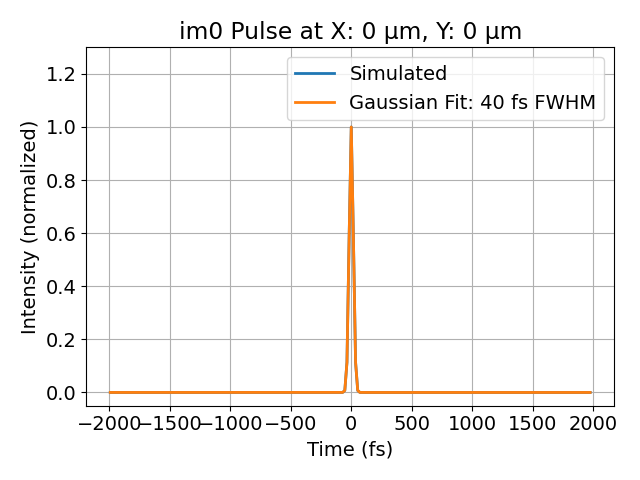

<IPython.core.display.Javascript object>


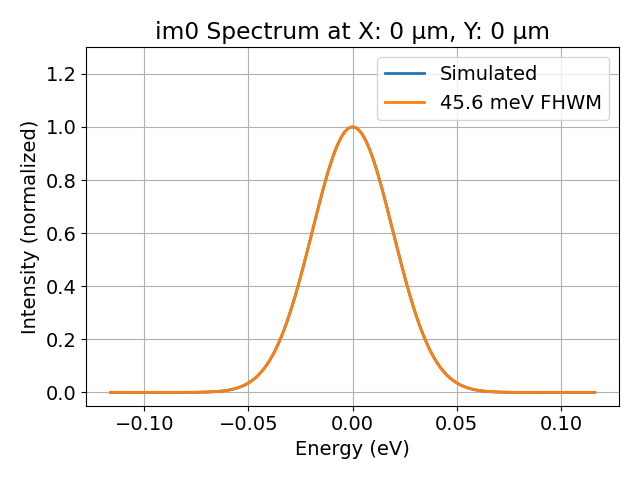

<IPython.core.display.Javascript object>


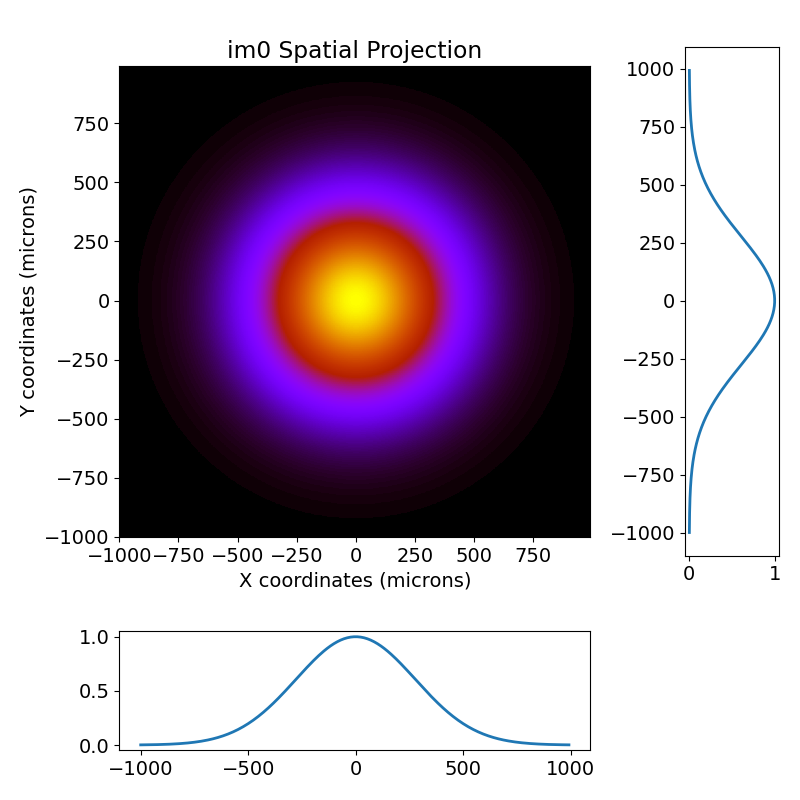

(<matplotlib.axes._subplots.AxesSubplot at 0x11bc4c4d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a13f550>)

In [223]:
# plot input pulse at beam center
pulse.plot_pulse('im0')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plot input beam spatial projection
pulse.imshow_projection('im0')

### Visualize focus properties

<IPython.core.display.Javascript object>


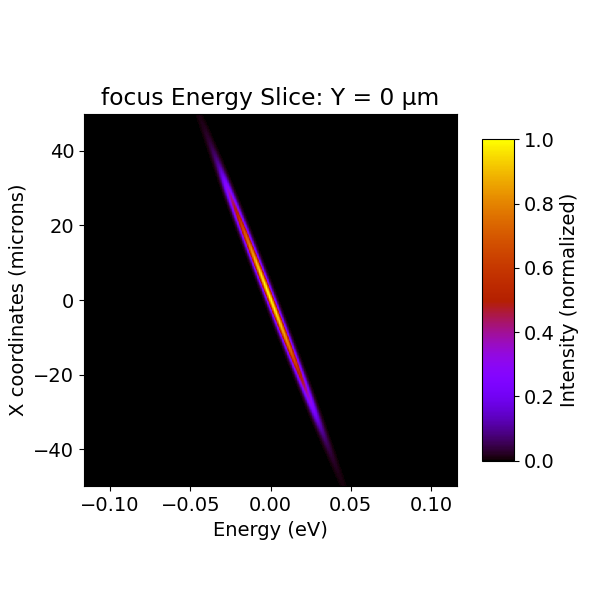

<IPython.core.display.Javascript object>


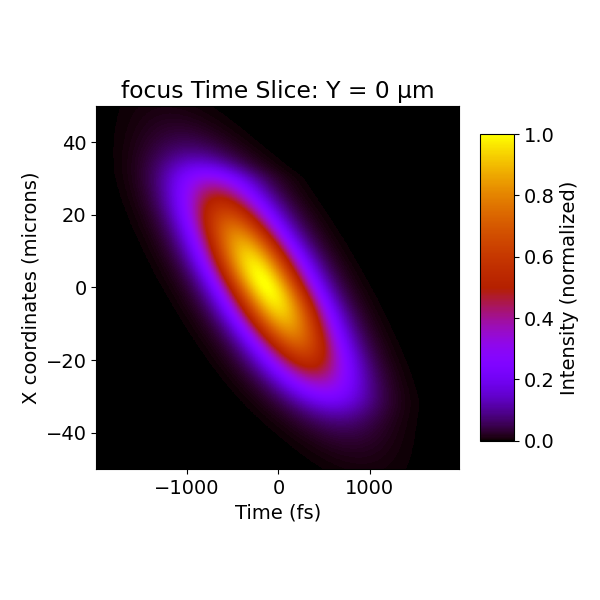

128


<IPython.core.display.Javascript object>


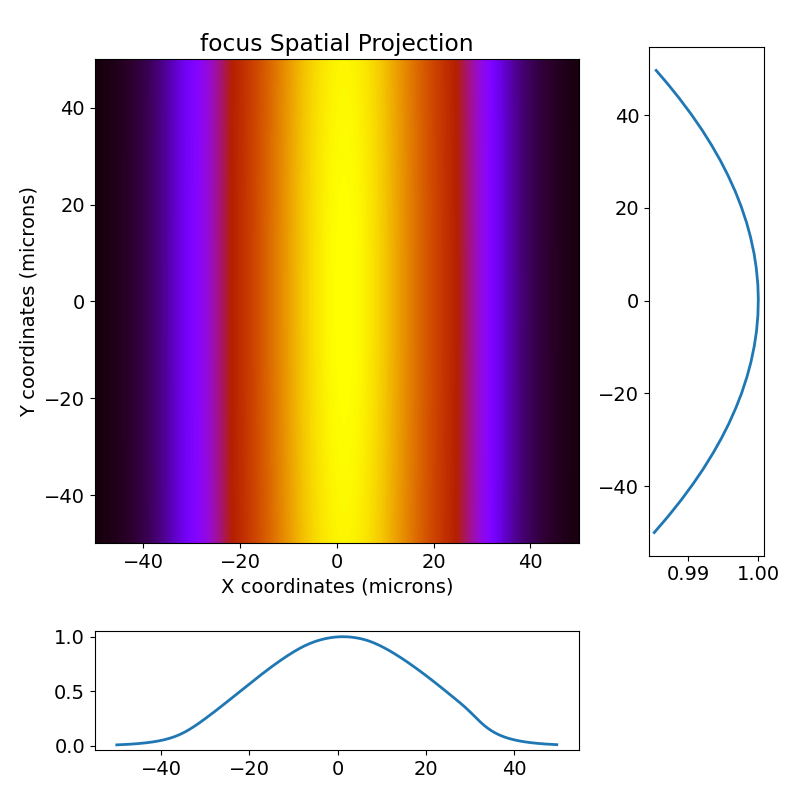

(<matplotlib.axes._subplots.AxesSubplot at 0x11b335d90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11985c150>)

In [226]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=1200)
# show spatial projection
pulse.imshow_projection('focus')

### Visualize output

<IPython.core.display.Javascript object>


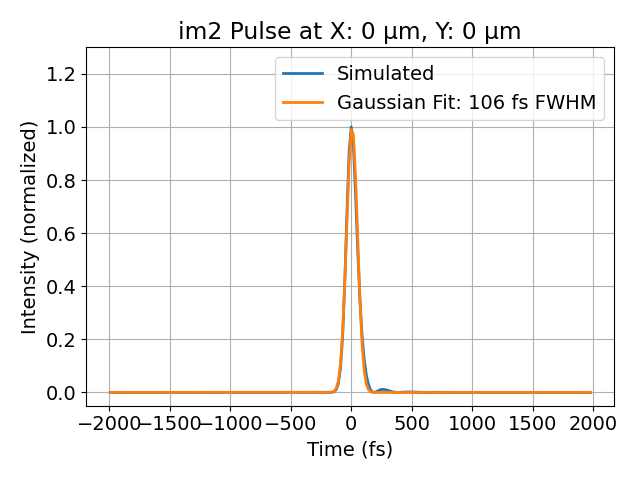

<IPython.core.display.Javascript object>


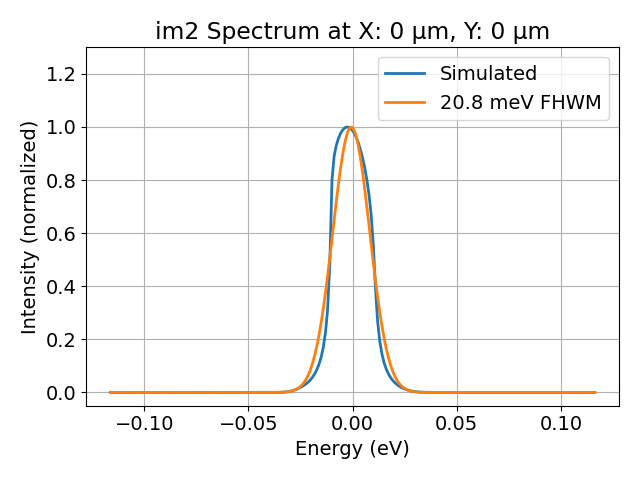

<IPython.core.display.Javascript object>


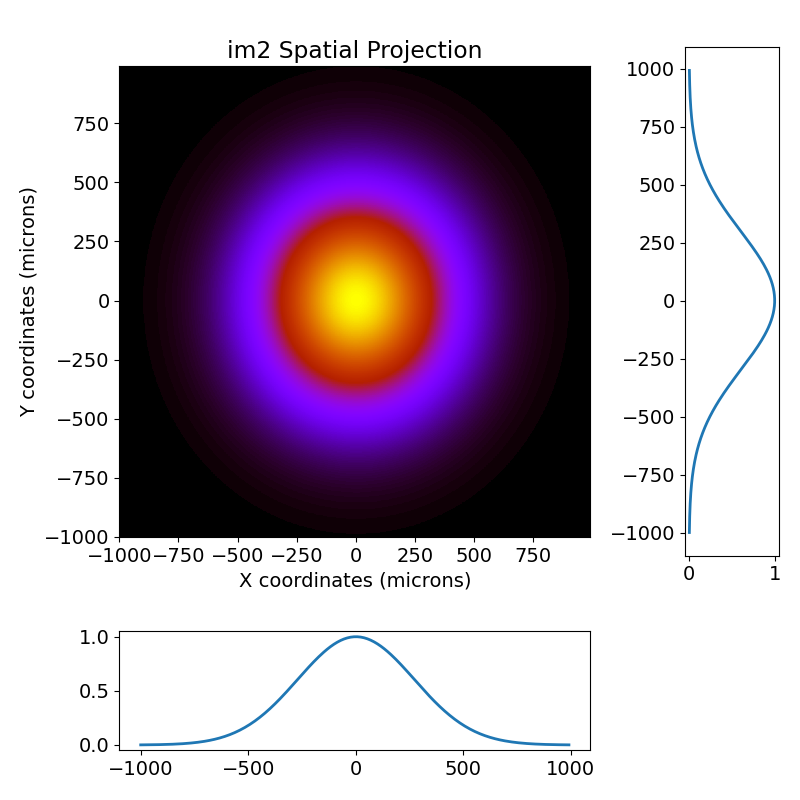

<IPython.core.display.Javascript object>


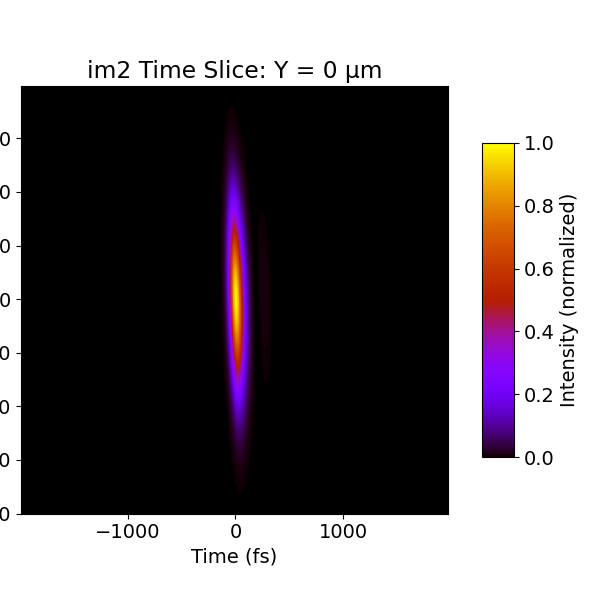

128


<IPython.core.display.Javascript object>


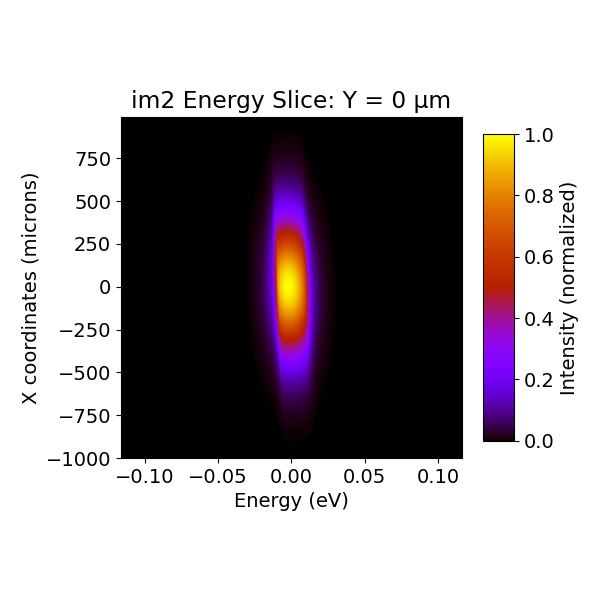

<IPython.core.display.Javascript object>


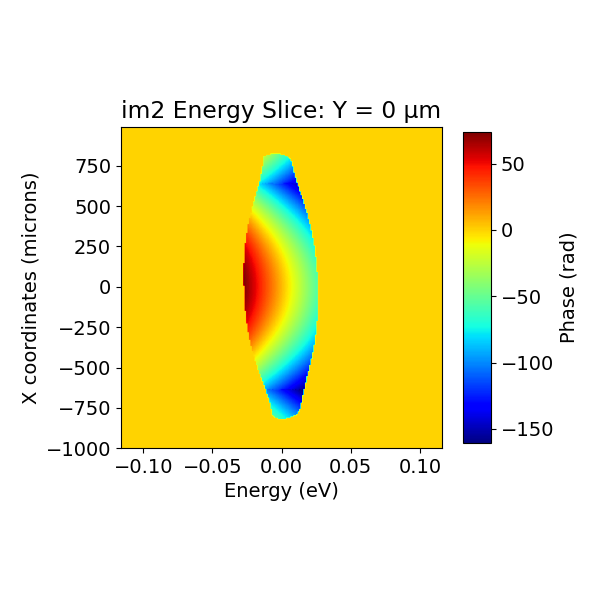

In [229]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=1600)
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# show spatial projection of output
pulse.imshow_projection('im2')
# show time slice of output
pulse.imshow_time_slice('im2', shift=1600)
# show energy slice of output
pulse.imshow_energy_slice('im2')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09


In [8]:
1/(1/6+1/3)

2.0

In [34]:
37/20

1.85

In [11]:
400/8

50.0

In [32]:
9*2/20

0.9